<div style="position: relative; width: 100%; height: 14vh" >
  <img src="img/isw.png" style="position: absolute; right: 0px" width="50%" >
</div>

# Data Science in der Produktion 
## Uebung 2: Modellbildung

# Inhaltsverzeichnis
1. [Einfuehrung](#introduction)
2. [Supervised Learning](#paragraph1)
    1. [Klassifikation und Regression](#subparagraph1)
    2. [Generalisierung, Overfitting und Underfitting](#subparagraph2)
    3. [Algorithmen](#subparagraph3)
        1. [kNN](#subsubparagraph1)
        2. [Decision Trees](#subsubparagraph2)
        3. [Lineare Modelle](#subsubparagraph3)
    4. [Regression](#subparagraph4)
        1. [Lasso](#subsubparagraph4)
        2. [Ridge](#subsubparagraph4)
    5. [Modell-Evaluation](#subparagraph5)
3. [Zusammenfassung und Ausblick](#paragraph2)





#### Sub Sub paragraph <a name="subsubparagraph1"></a>
This is a sub sub paragraph, formatted in heading 3 style

## Another paragraph <a name="paragraph2"></a>
The second paragraph text

In [16]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt

## 1. Einfuehrung <a name="introduction"></a>

Warum Python? 

Python hat sich zur lingua franca für viele datenwissenschaftliche Anwendungen entwickelt. Es kombiniert die Leistungsfähigkeit universeller Programmiersprachen mit der Benutzerfreundlichkeit domänenspezifischer Skriptsprachen wie MATLAB oder R. Python verfügt über Bibliotheken für das Laden von Daten, Visualisierung, Statistik, Verarbeitung natürlicher Sprachen, Bildverarbeitung und mehr. Diese umfangreiche Toolbox bietet den Datenwissenschaftlern eine große Auswahl an allgemeinen und speziellen Funktionen. Einer der Hauptvorteile von Python ist die Möglichkeit, direkt mit dem Code zu interagieren, mit einem Terminal oder anderen Tools wie dem Jupyter Notebook, das wir in Kürze vorstellen werden. Machine Learning und Datenanalyse sind funda- mental iterative Prozesse, bei denen die Daten die Analyse antreiben. Es ist wichtig, dass diese Prozesse über Werkzeuge verfügen, die eine schnelle Iteration und einfache Interaktion ermöglichen. Als universelle Programmiersprache ermöglicht Python auch die Erstellung komplexer grafischer Benutzeroberflächen (GUIs) und Webservices sowie die Integration in bestehende Systeme.



Scikit-Lernen

scikit-learn ist ein Open-Source-Projekt, d.h. es ist kostenlos zu verwenden und zu verbreiten, und jeder kann leicht den Quellcode erhalten, um zu sehen, was hinter den Kulissen vor sich geht. Das scikit-learn-Projekt wird ständig weiterentwickelt und verbessert und hat eine sehr aktive Nutzergemeinde. Es enthält eine Reihe modernster maschineller Lernalgorithmen sowie eine umfassende Dokumentation zu jedem Algorithmus. scikit-learn ist ein sehr beliebtes Werkzeug und die führende Python-Bibliothek für maschinelles Lernen. Es ist in der Industrie und Wissenschaft weit verbreitet, und eine Fülle von Tutorials und Codeausschnitten sind online verfügbar. scikit-learn funktioniert gut mit einer Reihe anderer wissenschaftlicher Python-Tools, auf die wir später in diesem Kapitel eingehen werden. Während Sie dies lesen, empfehlen wir Ihnen, auch das scikit-learn Benutzerhandbuch und die API-Dokumentation zu lesen, um weitere Details und viele weitere Optionen für jeden Algorithmus zu erhalten. Die Online-Dokumentation ist sehr gründlich, und dieses Buch bietet Ihnen alle Voraussetzungen, um es im Detail zu verstehen.


Installation von scikit-learn

scikit-learn hängt von zwei weiteren Python-Paketen ab, NumPy und SciPy. Für die grafische Darstellung und interaktive Entwicklung sollten Sie auch matplotlib, IPython und das Jupyter Notebook installieren. Wir empfehlen die Verwendung einer der folgenden vorkonfigurierten Python-Distributionen, die die notwendigen Pakete bereitstellen:

In [ ]:
%%bash
pip3 install numpy scipy matplotlib ipython scikit-learn pandas --user

Wichtige Bibliotheken und Tools 

Es ist wichtig zu verstehen, was Scikit-Learning ist und wie man es verwendet, aber es gibt noch ein paar andere Bibliotheken, die Ihre Erfahrung verbessern werden. Scikit-Learning basiert auf den wissenschaftlichen NumPy- und SciPy-Python-Bibliotheken. Zusätzlich zu NumPy und SciPy werden wir Pandas und Matplotlib verwenden. Wir stellen auch das Jupyter Notebook vor, eine browserbasierte interaktive Programmierumgebung. Kurz gesagt, hier ist, was Sie über diese Tools wissen sollten, um das Beste aus dem scikit-learn herauszuholen. 


Jupyter Notebook 

Das Jupyter Notebook ist eine interaktive Umgebung zum Ausführen von Code im Browser. Es ist ein großartiges Werkzeug für die explorative Datenanalyse und wird von Datenwissenschaftlern häufig verwendet. Während das Jupyter Notebook viele Programmiersprachen unterstützt, benötigen wir nur die Python-Unterstützung. Das Jupyter Notebook macht es einfach, Code, Text und Bilder einzubinden, und all dieses Buch wurde tatsächlich als Jupyter Notebook geschrieben. Alle von uns mitgelieferten Codebeispiele können von GitHub heruntergeladen werden. 


NumPy  

NumPy ist eines der grundlegenden Pakete für wissenschaftliches Rechnen in Python. Es enthält Funktionen für multidimensionale Arrays, mathematische Funktionen auf hohem Niveau wie lineare Algebraoperationen und die Fourier-Transformation sowie Pseudozufallszahlengeneratoren. Im scikit-learn ist das NumPy-Array die grundlegende Datenstruktur. scikit-learn nimmt Daten in Form von NumPy-Arrays auf. Alle Daten, die Sie verwenden, müssen an ein NumPy-Array übergeben werden. Die Kernfunktionalität von NumPy ist die Klasse ndarray, ein multidimensionales (n-dimensionales) Array. Alle Elemente des Arrays müssen vom gleichen Typ sein. Ein NumPy-Array sieht so aus:

In [18]:
import numpy as np
x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


Wir werden NumPy in diesem Buch viel verwenden, und wir werden auf Objekte der NumPy ndarray-Klasse als "NumPy-Arrays" oder einfach als "Arrays" verweisen.

SciPy  

SciPy ist eine Sammlung von Funktionen für das wissenschaftliche Rechnen in Python. Es bietet unter anderem fortschrittliche lineare Algebra-Routinen, mathematische Funktionsoptimierung, Signalverarbeitung, spezielle mathematische Funktionen und statistische Verteilungen. scikit-learn bezieht sich auf SciPys Sammlung von Funktionen zur Implementierung seiner Algorithmen. Der wichtigste Teil von SciPy für uns ist scipy.sparse: Dies liefert spärliche Matrizen, die eine weitere Darstellung sind, die für Daten in scikit\x02learn verwendet wird. Sparse Matrizen werden immer dann verwendet, wenn wir ein 2D-Array speichern wollen, das meist Nullen enthält:

In [19]:
from scipy import sparse
# Create a 2D NumPy array with a diagonal of ones, and zeros everywhere else
eye = np.eye(4)
print("NumPy array:\n{}".format(eye))


NumPy array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [20]:
# Convert the NumPy array to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n{}".format(sparse_matrix))


SciPy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


Normalerweise ist es nicht möglich, dichte Darstellungen von spärlichen Daten zu erstellen (da sie nicht in den Speicher passen würden), also müssen wir spärliche Darstellungen direkt erstellen. Hier ist eine Möglichkeit, die gleiche spärliche Matrix wie bisher im COO-Format zu erstellen:


In [21]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n{}".format(eye_coo))

COO representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


Weitere Details zu SciPy Sparse Matrizen finden Sie in den SciPy Vorlesungsunterlagen.


matplotlib  

matplotlib ist die primäre wissenschaftliche Plottbibliothek in Python. Es bietet Funktionen zur Erstellung von Visualisierungen in Publikationsqualität, wie z.B. Liniendiagramme, Histogramme, Streudiagramme usw. Die Visualisierung Ihrer Daten und verschiedener Aspekte Ihrer Analyse kann Ihnen wichtige Erkenntnisse liefern, und wir werden matplotlib für alle unsere Visualisierungen verwenden. Wenn Sie im Jupyter Notebook arbeiten, können Sie Zahlen direkt im Browser anzeigen, indem Sie die Befehle %matplotlib notebook und %matplotlib inline verwenden. Wir empfehlen die Verwendung von %matplotlib Notebook, das eine interaktive Umgebung bietet (obwohl wir %matplotlib inline für die Produktion dieses Buches verwenden). Dieser Code erzeugt beispielsweise die Darstellung in Abbildung 1-1:

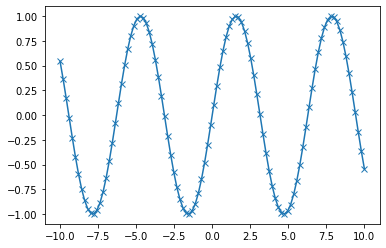

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# Create a second array using sine
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

Abbildung 1-1. Einfaches Linienplot der Sinusfunktion mit matplotlib

Pandas  

pandas ist eine Python-Bibliothek für Datenwrangling und Analyse. Es basiert auf einer Datenstruktur namens DataFrame, die nach dem R DataFrame aufgebaut ist. Einfach ausgedrückt, ist ein pandas DataFrame eine Tabelle, ähnlich einer Excel-Tabelle. pandas bietet eine Vielzahl von Methoden, um diese Tabelle zu modifizieren und zu bearbeiten; insbesondere erlaubt es SQL-ähnliche Abfragen und Joins von Tabellen. Im Gegensatz zu NumPy, das verlangt, dass alle Einträge in einem Array vom gleichen Typ sind, erlaubt pandas jeder Spalte einen eigenen Typ (z.B. ganze Zahlen, Datum, Gleitkommazahlen und Zeichenketten). Ein weiteres wertvolles Werkzeug von pandas ist die Möglichkeit, aus einer Vielzahl von Dateiformaten und Datenbanken wie SQL-, Excel- und CSV-Dateien (Comma Separated Values) zu übernehmen. Die Detaillierung der Funktionalität von Pandas liegt außerhalb des Umfangs dieses Buches. Python for Data Analysis von Wes McKinney (O'Reilly, 2012) bietet jedoch einen guten Leitfaden. Hier ist ein kleines Beispiel für die Erstellung eines Datenrahmens mit einem Dictionary:

In [25]:
import pandas as pd
# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
 'Location' : ["New York", "Paris", "Berlin", "London"],
 'Age' : [24, 13, 53, 33]
 }
data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)


,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


Es gibt mehrere Möglichkeiten, diese Tabelle abzufragen. Zum Beispiel

In [26]:
# Select all rows that have an age column greater than 30
display(data_pandas[data_pandas.Age > 40])

,Name,Location,Age
2,Peter,Berlin,53


mglearn  

Dieses Buch wird mit einem Begleitcode geliefert, den du auf GitHub finden kannst. Der zugehörige Code enthält nicht nur alle in diesem Buch gezeigten Beispiele, sondern auch die mglearn-Bibliothek. Dies ist eine Bibliothek von Hilfsfunktionen, die wir für dieses Buch geschrieben haben, damit wir unsere Codelisten nicht mit Details zum Plotten und Laden von Daten überladen. Wenn Sie interessiert sind, können Sie alle Funktionen im Repository nachschlagen, aber die Details des mglearn-Moduls sind für das Material in diesem Buch nicht wirklich wichtig. Wenn Sie einen Aufruf zum Mglearn im Code sehen, ist es normalerweise eine Möglichkeit, schnell ein ziemlich gutes Bild zu machen oder einige interessante Daten zu erhalten.


Im gesamten Buch verwenden wir NumPy, matplotlib und Pandas. Der gesamte Code geht von folgenden Importen aus:


    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    import mglearn
    
Wir gehen auch davon aus, dass Sie den Code in einem Jupyter Notebook ausführen werden, bei dem die %matplotlib Notebook- oder %matplotlib Inline-Magie aktiviert ist, um Plots anzuzeigen. Wenn Sie das Notebook oder diese magischen Befehle nicht verwenden, müssen Sie plt.show aufrufen, um tatsächlich eine der Figuren anzuzeigen.

Python 2 versus Python 3  

Es gibt zwei Hauptversionen von Python, die im Moment weit verbreitet sind: Python 2 (genauer gesagt, 2.7) und Python 3 (wobei die neueste Version zum Zeitpunkt der Erstellung 3.5 war). Dies führt manchmal zu Verwirrung. Python 2 ist nicht mehr aktiv entwickelt, aber da Python 3 große Änderungen enthält, läuft Python 2-Code in der Regel nicht mehr auf Python 3. Wenn Sie neu in Python sind oder ein neues Projekt von Grund auf neu starten, empfehlen wir Ihnen dringend, die neueste Version von Python 3 ohne Änderungen zu verwenden. Wenn Sie eine große Codebasis haben, auf die Sie sich verlassen können, die für Python 2 geschrieben ist, sind Sie vorerst vom Upgrade befreit. Sie sollten jedoch versuchen, so schnell wie möglich auf Python 3 zu migrieren. Beim Schreiben von neuem Code ist es größtenteils recht einfach, Code zu schreiben, der unter Python 2 und Python 3.2 läuft. Wenn Sie keine Schnittstelle zu vorhandener Software benötigen, sollten Sie unbedingt Python 3 verwenden. Der gesamte Code in diesem Buch ist so geschrieben, dass er für beide Versionen funktioniert. Die genaue Ausgabe kann sich jedoch unter Python 2 leicht unterscheiden.

Eine erste Anwendung: 

Klassifizierung von Iris-Arten In diesem Abschnitt werden wir eine einfache maschinelle Lernanwendung durchlaufen und unser erstes Modell erstellen. Dabei werden wir einige Kernkonzepte und Begriffe vorstellen. Nehmen wir an, dass eine Hobby-Botanikerin daran interessiert ist, die Art einiger Irisblüten zu unterscheiden, die sie gefunden hat. Sie hat einige Messungen gesammelt, die mit jeder Iris verbunden sind: die Länge und Breite der Blütenblätter sowie die Länge und Breite der Kelchblätter, alle gemessen in Zentimetern (siehe Abbildung 1-2). Sie hat auch die Messungen einiger Schwertlilien, die zuvor von einem erfahrenen Botaniker als zu den Arten Setosa, Versicolor oder Virginica gehörig identifiziert wurden. Für diese Messungen kann sie sicher sein, zu welcher Art jede Iris gehört. Nehmen wir an, dass dies die einzige Art ist, der unser Hobbybotaniker in freier Wildbahn begegnen wird. Unser Ziel ist es, ein maschinelles Lernmodell zu entwickeln, das aus den Messungen dieser Iris, deren Art bekannt ist, lernen kann, so dass wir die Art für eine neue Iris vorhersagen können.

<p align="center">
  <img src="img/iris.png">
</p>

Da wir Messungen haben, für die wir die richtige Irisart kennen, ist dies ein überwachtes Lernproblem. In diesem Problem wollen wir eine von mehreren Optionen vorhersagen (die Art der Iris). Dies ist ein Beispiel für ein Klassifizierungsproblem. Die möglichen Ausgaben (verschiedene Arten von Schwertlilien) werden als Klassen bezeichnet. Jede Iris im Datensatz gehört zu einer von drei Klassen, so dass es sich bei diesem Problem um ein Klassifizierungsproblem mit drei Klassen handelt. Die gewünschte Ausgabe für einen einzelnen Datenpunkt (eine Iris) ist die Art dieser Blume. Für einen bestimmten Datenpunkt wird die Art, zu der er gehört, als Label bezeichnet.

Die Daten kennenlernen

Die Daten, die wir für dieses Beispiel verwenden werden, sind der Iris-Datensatz, ein klassischer Datensatz im Bereich Machine Learning und Statistik. Es ist im scikit-learn im Datensatzmodul enthalten. Wir können es laden, indem wir die Funktion load_iris aufrufen:

In [27]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

Das Iris-Objekt, das von load_iris zurückgegeben wird, ist ein Bunch-Objekt, das einem Dictionary sehr ähnlich ist. Es enthält Schlüssel und Werte:

In [28]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


Der Wert des Schlüssels DESCR ist eine kurze Beschreibung des Datasets. Wir zeigen hier den Anfang der Beschreibung (den Rest können Sie sich gerne selbst ansehen):

In [29]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


Der Wert der wichtigsten target_names ist ein Array von Zeichenketten, die die Blumenart enthalten, die wir vorhersagen wollen:

In [30]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


Der Wert von feature_names ist eine Liste von Zeichenketten, die die Beschreibung jedes Features enthält:

In [31]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Die Daten selbst sind in den Ziel- und Datenfeldern enthalten. data enthält die numerischen Messungen der Kelchlänge, Kelchbreite, Kelchlänge und Kelchbreite in einem NumPy-Array:


In [32]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


Die Zeilen im Datenarray entsprechen Blumen, während die Spalten die vier Messungen darstellen, die für jede Blume durchgeführt wurden:

In [33]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


Wir sehen, dass das Array Messungen für 150 verschiedene Blumen enthält. Denken Sie daran, dass die einzelnen Elemente im maschinellen Lernen als Beispiele bezeichnet werden und ihre Eigenschaften als Merkmale. Die Form des Datenarrays ist die Anzahl der Samples multipliziert mit der Anzahl der Features. Dies ist eine Konvention im Scikit-Learning, und Ihre Daten werden immer in dieser Form angenommen. Hier sind die Merkmalswerte für die ersten fünf Samples:

In [34]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Aus diesen Daten können wir erkennen, dass alle ersten fünf Blüten eine Blütenblattbreite von 0,2 cm haben und dass die erste Blume mit 5,1 cm den längsten Sepal hat. Das Zielarray enthält die Arten jeder der gemessenen Blumen, auch als NumPy-Array:

In [35]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


Ziel ist ein eindimensionales Array mit einem Eintrag pro Blume:

In [36]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


Die Spezies werden als ganze Zahlen von 0 bis 2 kodiert:

In [37]:
print("Target:\n{}".format(iris_dataset['target']))


Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Die Bedeutung der Zahlen wird durch das Array iris['target_names'] gegeben: 0 bedeutet Setosa, 1 bedeutet Versicolor und 2 bedeutet Virginica.

Erfolgsmessung: Trainings- und Testdaten      

Aus diesen Daten wollen wir ein maschinelles Lernmodell erstellen, das die Eigenschaften der Iris für einen neuen Messsatz vorhersagen kann. Aber bevor wir unser Modell auf neue Messungen anwenden können, müssen wir wissen, ob es tatsächlich funktioniert, das heißt, ob wir seinen Vorhersagen vertrauen sollten. 
Leider können wir die Daten, die wir für den Aufbau des Modells verwendet haben, nicht für dessen Auswertung verwenden. Denn unser Modell kann sich immer einfach den gesamten Trainingssatz merken und wird daher immer die richtige Bezeichnung für jeden Punkt im Trainingssatz vorhersagen. Dieses "Erinnern" zeigt uns nicht an, ob unser Modell gut verallgemeinert wird (mit anderen Worten, ob es auch bei neuen Daten gut funktioniert). 
Um die Leistung des Modells zu beurteilen, zeigen wir ihm neue Daten (Daten, die er bisher nicht gesehen hat), für die wir Labels haben. Dies geschieht in der Regel durch die Aufteilung der von uns erhobenen beschrifteten Daten (hier unsere 150 Blumenmessungen) in zwei Teile. Ein Teil der Daten wird zum Aufbau unseres maschinellen Lernmodells verwendet und nennt sich Trainingsdaten oder Trainingsset. Der Rest der Daten wird verwendet, um zu beurteilen, wie gut das Modell funktioniert; dies wird als Testdaten, Testsatz oder Hold-Out-Set bezeichnet. 
scikit-learn enthält eine Funktion, die den Datensatz mischt und für Sie aufteilt: die Funktion train_test_split. Diese Funktion extrahiert 75% der Zeilen in den Daten als Trainings-Set zusammen mit den entsprechenden Bezeichnungen für diese Daten. Die restlichen 25% der Daten werden zusammen mit den übrigen Etiketten als Testset deklariert. Entscheidung für eine Erstanwendung: Iris zu klassifizieren, wie viele Daten Sie in das Training bzw. das Testset einbringen wollen, ist etwas Beliebiges, aber die Verwendung eines Testsets mit 25% der Daten ist eine gute Faustregel. In scikit-learn werden Daten in der Regel mit einem großen X bezeichnet, während Bezeichnungen mit einem kleinen y gekennzeichnet sind. Dies ist inspiriert von der Standardformulierung f(x)=y in der Mathematik, wobei x der Eingang zu einer Funktion und y die Ausgabe ist. Nach weiteren Konventionen aus der Mathematik verwenden wir ein großes X, weil die Daten ein zweidimensionales Array (eine Matrix) sind und ein kleines y, weil das Ziel ein eindimensionales Array (ein Vektor) ist. Rufen wir train_test_split auf unseren Daten auf und weisen wir die Ausgaben über diese Nomenklatur zu:

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 iris_dataset['data'], iris_dataset['target'], random_state=0)

Vor dem Splitten mischt die Funktion train_test_split den Datensatz mit einem Pseudozufallszahlengenerator. Wenn wir nur die letzten 25% der Daten als Testsatz nehmen würden, hätten alle Datenpunkte das Label 2, da die Datenpunkte nach dem Label sortiert sind (siehe Ausgabe für iris['target'] früher gezeigt). Die Verwendung eines Testsets, das nur eine der drei Klassen enthält, würde uns nicht viel darüber aussagen, wie gut unser Modell verallgemeinert, also mischen wir unsere Daten, um sicherzustellen, dass die Testdaten Daten aus allen Klassen enthalten.  Um sicherzustellen, dass wir die gleiche Ausgabe erhalten, wenn wir die gleiche Funktion mehrmals ausführen, stellen wir dem Pseudozufallszahlengenerator mit dem Parameter random_state einen festen Samen zur Verfügung. Dies macht das Ergebnis deterministisch, so dass diese Linie immer das gleiche Ergebnis hat. Wir werden den random_state immer auf diese Weise beheben, wenn wir in diesem Buch randomisierte Verfahren verwenden.  Die Ausgabe der Funktion train_test_split ist X_train, X_test, y_train und y_test, die alle NumPy-Arrays sind. X_train enthält 75% der Zeilen des Datasets, und X_test enthält die restlichen 25%:  

In [39]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [40]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


Das Wichtigste zuerst: Betrachten Sie Ihre Daten      

Vor der Erstellung eines maschinellen Lernmodells ist es oft eine gute Idee, die Daten zu überprüfen, um zu sehen, ob die Aufgabe ohne maschinelles Lernen leicht lösbar ist oder ob die gewünschten Informationen nicht in den Daten enthalten sind. Darüber hinaus ist die Überprüfung Ihrer Daten ein guter Weg, um Anomalien und Besonderheiten zu finden. Vielleicht wurden einige Ihrer Irisblenden zum Beispiel mit Zoll und nicht mit Zentimetern gemessen. In der realen Welt sind Inkonsistenzen in den Daten und unerwartete Messungen sehr häufig.  Eine der besten Möglichkeiten, Daten zu inspizieren, ist die Visualisierung. Eine Möglichkeit, dies zu tun, ist die Verwendung eines Streudiagramms. Ein Streudiagramm der Daten setzt ein Merkmal entlang der x-Achse und ein weiteres entlang der y-Achse und zeichnet für jeden Datenpunkt einen Punkt. Leider haben Computerbildschirme nur zwei Dimensionen, was es uns erlaubt, nur zwei (oder vielleicht drei) Merkmale auf einmal darzustellen. Es ist schwierig, Datensätze mit mehr als drei Merkmalen auf diese Weise darzustellen. Eine Möglichkeit, dieses Problem zu umgehen, besteht darin, einen Paarplot zu erstellen, der alle möglichen Merkmalspaare betrachtet. Wenn Sie eine kleine Anzahl von Funktionen haben, wie z.B. die vier, die wir hier haben, ist das durchaus sinnvoll. Sie sollten jedoch bedenken, dass ein Paarplot nicht das Zusammenspiel aller Features auf einmal darstellt, so dass einige interessante Aspekte der Daten bei der Visualisierung auf diese Weise möglicherweise nicht offenbart werden.  Abbildung 1-3 ist ein Paardiagramm der Funktionen im Trainingsset. Die Datenpunkte sind nach der Art der Iris gefärbt. Um den Plot zu erstellen, konvertieren wir zuerst das NumPy-Array in einen pandas DataFrame. pandas hat die Funktion, Paarplots namens scatter_matrix zu erstellen. Die Diagonale dieser Matrix ist mit Histogrammen der einzelnen Merkmale gefüllt:

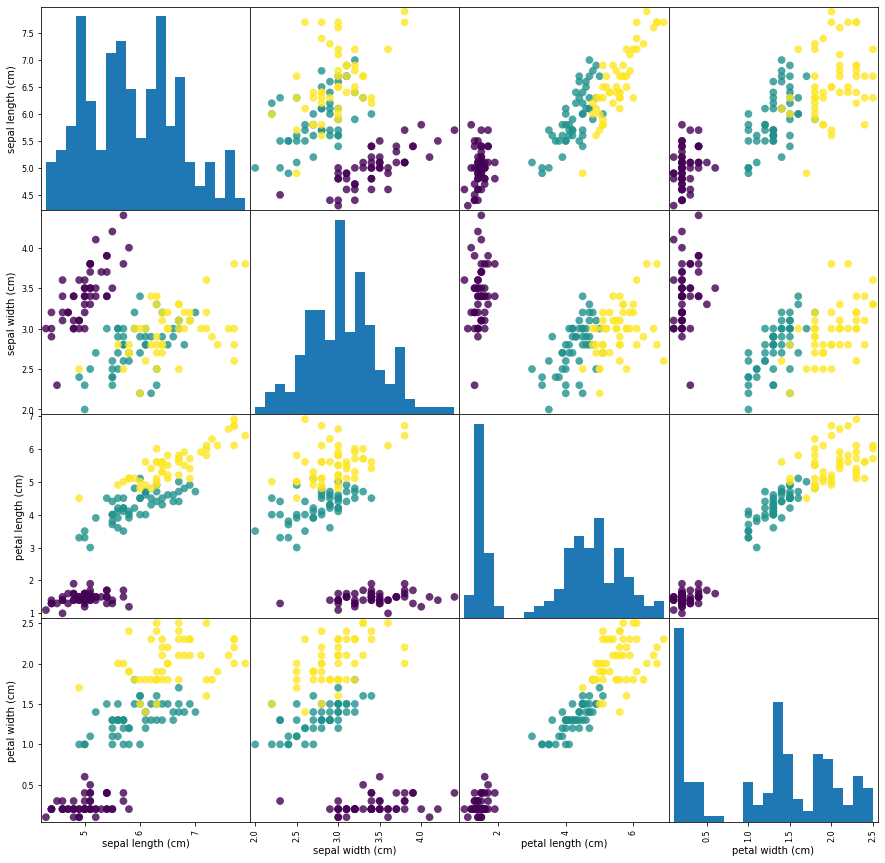

In [41]:
import pandas as pd
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
from sklearn import datasets

iris_dataset = datasets.load_iris()
X = iris_dataset.data
Y = iris_dataset.target

iris_dataframe = pd.DataFrame(X, columns=iris_dataset.feature_names)

# Create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=Y, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

Abbildung 1-3. Paarplot des Iris-Datensatzes, eingefärbt durch Klassenlabel

Von den Plots aus können wir sehen, dass die drei Klassen durch die Messungen von Kelch und Blütenblatt relativ gut getrennt zu sein scheinen. Das bedeutet, dass ein maschinelles Lernmodell wahrscheinlich in der Lage sein wird, zu lernen, sie zu trennen.

Bildung des ersten Modells: 

k-Nearest Neighbors Jetzt können wir mit dem Bau des eigentlichen maschinellen Lernmodells beginnen. Es gibt viele Klassifizierungsalgorithmen im Scikit-Learning, die wir verwenden könnten. Hier verwenden wir einen k-nearest neighbors classifier, der leicht zu verstehen ist. Der Aufbau dieses Modells besteht nur aus der Speicherung des Trainingssets. Um eine Vorhersage für einen neuen Datenpunkt zu machen, findet der Algorithmus den Punkt in der Trainingsmenge, der dem neuen Punkt am nächsten liegt. Dann ordnet er die Bezeichnung dieses Trainingspunktes dem neuen Datenpunkt zu.  Das k in k-nearest neighbors bedeutet, dass wir, anstatt nur den nächstgelegenen Nachbarn des neuen Datenpunkts zu verwenden, eine beliebige feste Anzahl k von Nachbarn im Training berücksichtigen können (z.B. die nächsten drei oder fünf Nachbarn). Dann können wir eine Vorhersage mit der Mehrheitsklasse unter diesen Nachbarn machen. Wir werden in Kapitel 2 näher darauf eingehen; im Moment werden wir nur einen einzigen Nachbarn verwenden. Alle maschinellen Lernmodelle im Scikit-Learning werden in eigenen Klassen implementiert, die als Estimator-Klassen bezeichnet werden. Der k-nearest neighbors Klassifikationsalgorithmus ist in der Klasse KNeighborsClassifier im Nachbarmodul implementiert. Bevor wir das Modell verwenden können, müssen wir die Klasse in ein Objekt instanziieren. In diesem Fall werden wir alle Parameter des Modells einstellen. Der wichtigste Parameter des KNeighbor sClassifier ist die Anzahl der Nachbarn, die wir auf 1 setzen werden:


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

Das knn-Objekt kapselt den Algorithmus, der verwendet wird, um das Modell aus den Trainingsdaten aufzubauen, sowie den Algorithmus, um Vorhersagen über neue Datenpunkte zu treffen. Es enthält auch die Informationen, die der Algorithmus aus den Trainingsdaten extrahiert hat. Im Falle von KNeighborsClassifier wird nur das Trainingsset gespeichert.  Um das Modell auf dem Trainingssatz aufzubauen, rufen wir die Fit-Methode des knn-Objekts auf, die als Argumente das NumPy-Array X_train mit den Trainingsdaten und das NumPy-Array y_train der entsprechenden Trainingslabels verwendet:  


In [43]:
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Die Fit-Methode gibt das knn-Objekt selbst zurück (und modifiziert es an Ort und Stelle), so dass wir eine Zeichenkettendarstellung unseres Klassifikators erhalten. Die Darstellung zeigt uns, welche Parameter bei der Erstellung des Modells verwendet wurden. Fast alle von ihnen sind die Standardwerte, aber du kannst auch n_neighbors=1 finden, was der Parameter ist, den wir übergeben haben. Die meisten Modelle im Scikit-Learning haben viele Parameter, aber die meisten davon sind entweder Geschwindigkeitsoptimierungen oder für ganz spezielle Anwendungsfälle. Sie müssen sich keine Gedanken über die anderen in dieser Darstellung dargestellten Parameter machen. Das Drucken eines Scikit-Lernmodells kann sehr lange Zeichenketten ergeben, lässt sich aber davon nicht einschüchtern. In Kapitel 2 werden wir alle wichtigen Parameter behandeln. Im weiteren Verlauf dieses Buches werden wir die Ausgabe der Anpassung nicht zeigen, da sie keine neuen Informationen enthält. 


Prädiktion

Wir können jetzt Vorhersagen mit diesem Modell auf neuen Daten treffen, für die wir möglicherweise nicht die richtigen Bezeichnungen kennen. Stellen Sie sich vor, wir hätten eine Iris in der Wildnis mit einer Kelchlänge von 5 cm, einer Kelchbreite von 2,9 cm, einer Kelchlänge von 1 cm und einer Kelchbreite von 0,2 cm gefunden. Welche Art von Iris wäre das? Wir können diese Daten in ein NumPy-Array einfügen, indem wir wiederum die Form berechnen, d.h. die Anzahl der Proben (1) multipliziert mit der Anzahl der Merkmale (4):   



In [44]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


Beachten Sie, dass wir die Messungen dieser einzelnen Blume in einer Reihe in einem zweidimensionalen NumPy-Array durchgeführt haben, da scikit-learn immer zweidimensionale Arrays erwartet.
für die Daten.

Um eine Vorhersage zu machen, rufen wir die predict-Methode des knn-Objekts auf:

In [45]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
 iris_dataset['target_names'][prediction]))


Prediction: [0]
Predicted target name: ['setosa']


Unser Modell sagt voraus, dass diese neue Iris zur Klasse 0 gehört, d.h. ihre Art ist Setosa. Aber woher wissen wir, ob wir unserem Modell vertrauen können? Wir kennen die richtige Art dieser Probe nicht, was der Sinn der Modellbildung ist!


Evaluierung des Modells 

Hier kommt das Testset zum Einsatz, das wir zuvor erstellt haben. Diese Daten wurden nicht für den Modellbau verwendet, aber wir wissen, was die richtige Spezies für jede Iris im Testset ist. Daher können wir für jede Iris in den Testdaten eine Vorhersage machen und sie mit ihrem Label (der bekannten Art) vergleichen. Wir können messen, wie gut das Modell funktioniert, indem wir die Genauigkeit berechnen, d.h. den Anteil der Blüten, für den die richtige Art vorhergesagt wurde:  



In [46]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [47]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


Wir können auch die Score-Methode des knn-Objekts verwenden, die für uns die Genauigkeit des Testsets berechnet:

Für dieses Modell liegt die Genauigkeit des Testsets bei etwa 0,97, was bedeutet, dass wir die richtige Vorhersage für 97% der Iris im Testset getroffen haben. Unter einigen mathematischen Annahmen bedeutet dies, dass wir erwarten können, dass unser Modell in 97% der Fälle für neue Irisblenden korrekt ist. Für unsere Hobby-Botaniker bedeutet diese hohe Genauigkeit, dass unser Modell vertrauenswürdig genug ist, um verwendet zu werden. In späteren Kapiteln werden wir diskutieren, wie wir die Leistung verbessern können und welche Nachteile es beim Tuning eines Modells gibt. 


Zusammenfassung und Ausblick 
 
Fassen wir zusammen, was wir in diesem Kapitel gelernt haben. Wir begannen mit einer kurzen Einführung in das maschinelle Lernen und seine Anwendungen, diskutierten dann die Unterscheidung zwischen überwachtem und unbeaufsichtigtem Lernen und gaben einen Überblick über die Werkzeuge, die wir in diesem Buch verwenden werden. Dann formulierten wir die Aufgabe, vorherzusagen, zu welcher Irisart eine bestimmte Blume gehört, indem wir physikalische Messungen der Blume verwenden. Wir haben einen Datensatz von Messungen verwendet, der von einem Experten mit der richtigen Spezies kommentiert wurde, um unser Modell zu erstellen, was dies zu einer überwachten Lernaufgabe macht. Es gab drei mögliche Arten, Setosa, Versicolor oder Virginica, was die Aufgabe zu einem Problem der Klassifizierung in drei Klassen machte. Die möglichen Arten werden im Klassifizierungsproblem als Klassen bezeichnet, und die Arten einer einzelnen Iris werden als Label bezeichnet.  Der Iris-Datensatz besteht aus zwei NumPy-Arrays: einem mit den Daten, die im scikit-learn als X bezeichnet werden, und einem mit den korrekten oder gewünschten Ausgaben, das y genannt wird. Das Array X ist ein zweidimensionales Array von Merkmalen mit einer Zeile pro Datenpunkt und einer Spalte pro Merkmal. Das Array y ist ein eindimensionales Array, das hier ein Klassenlabel, eine ganze Zahl im Bereich von 0 bis 2, für jedes der Samples enthält. Wir teilen unseren Datensatz in einen Trainingssatz, um unser Modell zu erstellen, und einen Testsatz, um zu beurteilen, wie gut sich unser Modell auf neue, bisher unbekannte Daten verallgemeinern wird.  Wir haben den k-nearest neighbors Klassifikationsalgorithmus gewählt, der Vorhersagen für einen neuen Datenpunkt macht, indem er seine nächsten Nachbarn im Trainingssatz berücksichtigt. Dies ist in der Klasse KNeighborsClassifier implementiert, die sowohl den Algorithmus zum Aufbau des Modells als auch den Algorithmus zur Vorhersage anhand des Modells enthält. Wir haben die Klasse instanziiert und Parameter gesetzt. Dann haben wir das Modell erstellt, indem wir die Fit-Methode aufgerufen und die Trainingsdaten (X_train) und Trainingsergebnisse (y_train) als Parameter übergeben haben. Wir haben das Modell mit der Score-Methode bewertet, die die Genauigkeit des Modells berechnet. Wir haben die Score-Methode auf die Daten des Testsatzes und die Labels des Testsatzes angewendet und festgestellt, dass unser Modell etwa 97% genau ist, d.h. es ist 97% der Zeit auf dem Testset korrekt.  

Dies gab uns das Vertrauen, das Modell auf neue Daten anzuwenden (in unserem Beispiel, neue Blumenmessungen) und das Vertrauen, dass das Modell in etwa 97% der Fälle korrekt ist. Hier ist eine Zusammenfassung des Codes, der für das gesamte Trainings- und Bewertungsverfahren benötigt wird: 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
 iris_dataset['data'], iris_dataset['target'], random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


Dieser Ausschnitt enthält den Kerncode für die Anwendung eines beliebigen maschinellen Lernalgorithmus mit Scikit-Learning. Die Fit-, Vorhersage- und Bewertungsmethoden sind die gemeinsame Schnittstelle zu überwachten Modellen im Scikit-Learning, und mit den in diesem Kapitel vorgestellten Konzepten können Sie diese Modelle auf viele Aufgaben des maschinellen Lernens anwenden. Im nächsten Kapitel gehen wir näher auf die verschiedenen Arten von überwachten Modellen im Scikit-Learning ein und wie man sie erfolgreich einsetzt.

## 2. Supervised Learning <a name="paragraph1"></a>

Wie bereits erwähnt, ist überwachtes maschinelles Lernen eine der am häufigsten verwendeten und erfolgreichsten Formen des maschinellen Lernens. In diesem Kapitel werden wir das super-visuelle Lernen näher beschreiben und mehrere beliebte Algo-Rhythmen des überwachten Lernens erklären. Wir haben bereits in Kapitel 1 eine Anwendung des überwachten maschinellen Lernens gesehen: die Klassifizierung von Irisblüten in mehrere Arten unter Verwendung physikalischer Messungen der Blüten. Denken Sie daran, dass überwachtes Lernen verwendet wird, wenn wir ein bestimmtes Ergebnis aus einem bestimmten Input vorhersagen wollen, und wir haben Beispiele für Input/Output-Paare. Aus diesen Input/Output-Paaren, die unseren Trainingssatz bilden, bauen wir ein maschinelles Lernmodell auf. Unser Ziel ist es, genaue Vorhersagen für neue, noch nie da gewesene Daten zu treffen. Super-visuelles Lernen erfordert oft menschliche Anstrengung, um den Trainingssatz aufzubauen, automatisiert und beschleunigt danach jedoch oft eine ansonsten mühsame oder unausführbare Aufgabe.


### 2.1 Klassifikation und Regression <a name="subparagraph1"></a>


Es gibt zwei Haupttypen von überwachten maschinellen Lernproblemen, die als Klassifizierung und Regression bezeichnet werden. Bei der Klassifizierung geht es darum, ein Klassenlabel vorherzusagen, das eine Auswahl aus einer vordefinierten Liste von Möglichkeiten ist. In Kapitel 1 haben wir das Beispiel der Klassifizierung von Iris in eine von drei möglichen Arten verwendet. Die Klassifikation wird manchmal in binäre Klassifikation, d.h. den Sonderfall der Unterscheidung zwischen genau zwei Klassen, und Multiklassenklassifikation, d.h. die Klassifikation zwischen mehr als zwei Klassen, unterteilt. Sie können sich die binäre Klassifizierung als den Versuch vorstellen, eine Ja/Nein-Frage zu beantworten. Die Klassifizierung von E-Mails als Spam oder nicht Spam ist ein Beispiel für ein binäres Klassifizierungsproblem. In dieser binären Klassifikationsaufgabe lautet die Ja/Nein-Frage "Ist diese E-Mail Spam", während das Iris-Beispiel ein Beispiel für eine mehrstufige Klassifikation prob- lem ist. Ein weiteres Beispiel ist die Vorhersage, in welcher Sprache eine Website ist, aus dem Text auf der Website. Die Klassen hier wären eine vordefinierte Liste möglicher Sprachen. Für Regressionsaufgaben ist es das Ziel, eine fortlaufende Zahl oder eine Gleitkommazahl in Programmiersprache (oder eine reelle Zahl in mathematischer Hinsicht) vorherzusagen. Die Vorhersage des Jahreseinkommens einer Person aus ihrer Ausbildung, ihrem Alter und ihrem Wohnort ist ein Beispiel für eine Regressionsaufgabe. Bei der Einkommensprognose ist der prognostizierte Wert ein Betrag und kann eine beliebige Zahl in einem bestimmten Bereich sein. Ein weiteres Beispiel für eine Regressionsaufgabe ist die Vorhersage des Ertrags einer Maisfarm anhand von Attributen wie früheren Erträgen, Wetter und Anzahl der auf der Farm arbeitenden Mitarbeiter. Die Ausbeute kann wiederum eine beliebige Zahl sein. Eine einfache Möglichkeit, zwischen Klassifizierungs- und Regressionsaufgaben zu unterscheiden, besteht darin, zu fragen, ob es eine Art Kontinuität in der Ausgabe gibt. Wenn es eine Kontinuität zwischen möglichen Ergebnissen gibt, dann ist das Problem ein Regressionsproblem. Denken Sie darüber nach, das Jahreseinkommen vorherzusagen. Es gibt eine klare Kontinuität in der Ausgabe. Ob eine Person 40.000 € oder 40.001 € pro Jahr verdient, macht keinen greifbaren Unterschied, auch wenn es sich um unterschiedliche Geldbeträge handelt; wenn unser Algorithmus 
39.999 € oder $40.001 voraussagt, wenn er 40.000 € hätte voraussagen sollen, macht uns das nichts aus. Für die Aufgabe, die Sprache einer Website zu erkennen (was ein Klassifizierungsproblem ist), gibt es dagegen keinen Abschluss. Eine Website ist in einer Sprache oder in einer anderen. Es gibt keine Kontinuität zwischen den Sprachen, und es gibt keine Sprache, die zwischen Englisch und Französisch liegt. 

### 2.2 Generalisierung, Overfitting und Underfitting <a name="subparagraph2"></a> 

Beim supervised learning wollen wir ein Modell auf der Grundlage der Trainingsdaten aufbauen und dann genaue Vorhersagen über neue, unsichtbare Daten treffen können, die die gleichen Eigenschaften haben wie das von uns verwendete Trainingsset. Wenn ein Modell in der Lage ist, genaue Vorhersagen über unsichtbare Daten zu treffen, sagen wir, dass es in der Lage ist, vom Trainingsset zum Testset zu generalisieren. Wir wollen ein Modell aufbauen, das in der Lage ist, so genau wie möglich zu generalisieren. Normalerweise bauen wir ein Modell so, dass es genaue Vorhersagen über das Trainingsset treffen kann. Wenn die Trainings- und Testsets genügend Gemeinsamkeiten haben, erwarten wir, dass das Modell auch auf dem Testset genau ist. Es gibt jedoch einige Fälle, in denen dies schief gehen kann. Wenn wir uns zum Beispiel erlauben, sehr komplexe Modelle zu erstellen, können wir am Trainingsset immer so genau sein, wie wir es wünschen. Werfen wir einen Blick auf ein erfundenes Beispiel, um diesen Punkt zu veranschaulichen. Sagen wir, ein Anfänger-Datenwissenschaftler will vorhersagen, ob ein Kunde ein Boot kaufen wird, angesichts der Aufzeichnungen von früheren Bootskäufern und Kunden, von denen wir wissen, dass sie nicht am Kauf eines Bootes interessiert sind.  Das Ziel ist es, Werbe-E-Mails an Personen zu versenden, die wahrscheinlich tatsächlich einen Kauf tätigen, aber nicht die Kunden stören, die nicht interessiert sind.

Angenommen, wir haben die in Tabelle 2-1 aufgeführten Kundendaten.


Tabelle 2-1. Beispieldaten über Kunden



<p align="center">
  <img src="img/table_customers.png">
</p>

Nachdem wir uns die Daten eine Weile angesehen haben, kommt unser Informatiker-Anfänger auf die folgende Regel: "Wenn der Kunde älter als 45 Jahre ist und weniger als 3 Kinder hat oder nicht geschieden ist, dann will er ein Boot kaufen." Auf die Frage, wie gut diese Regel von ihm funktioniert, antwortet unser Informatiker: "Sie ist 100 Prozent genau!" Und in der Tat, bei den Daten, die in der Tabelle stehen, ist die Regel absolut korrekt. Es gibt viele mögliche Regeln, die wir uns ausdenken könnten, die perfekt erklären würden, wenn jemand in diesem Datensatz ein Boot kaufen möchte. Kein Alter erscheint zweimal in den Daten, also könnten wir sagen, dass Menschen, die 66, 52, 53 oder 58 Jahre alt sind, ein Boot kaufen wollen, während alle anderen es nicht tun. Obwohl wir viele Regeln aufstellen können, die gut mit diesen Daten funktionieren, denken Sie daran, dass wir nicht daran interessiert sind, Vorhersagen für diesen Datensatz zu treffen; wir kennen bereits die Antworten für diese Kunden. Wir wollen wissen, ob neue Kunden wahrscheinlich ein Boot kaufen werden. Wir wollen daher eine Regel finden, die für Neukunden gut funktioniert, und eine 100-prozentige Genauigkeit des Trainingssets hilft uns dabei nicht weiter. Wir dürfen nicht erwarten, dass die von unserem Informatiker ausgearbeitete Regel bei Neukunden sehr gut funktioniert. Es erscheint zu komplex, und es wird von sehr wenigen Daten unterstützt. So hängt beispielsweise der Teil "oder ist nicht geschieden" der Regel von einem einzelnen Kunden ab. Das einzige Maß dafür, ob ein Algorithmus bei neuen Daten gut abschneidet, ist die Auswertung des Testsets. Intuitiv3 erwarten wir jedoch, dass einfache Modelle besser zu neuen Daten verallgemeinern. Wenn die Regel "Menschen über 50 Jahre wollen ein Boot kaufen" wäre, und das würde das Verhalten aller Kunden erklären, würden wir ihm mehr vertrauen als der Regel, die neben dem Alter auch Kinder und Familienstand betrifft. Deshalb wollen wir immer das einfachste Modell finden. Ein Modell zu erstellen, das für die Menge an Informationen, die wir haben, zu komplex ist, wie es unser Anfänger-Datenwissenschaftler getan hat, nennt man Überfitting. Eine Überanpassung tritt auf, wenn Sie ein Modell zu genau an die Besonderheiten des Trainingssets anpassen und ein Modell erhalten, das gut am Trainingsset funktioniert, aber nicht in der Lage ist, zu neuen Daten zu verallgemeinern. Andererseits, wenn Ihr Modell zu einfach ist - sagen Sie: "Jeder, der ein Haus besitzt, kauft ein Boot" - dann sind Sie vielleicht nicht in der Lage, alle Aspekte der Vielseitigkeit in den Daten zu erfassen, und Ihr Modell wird selbst auf dem Trainingsset schlecht abschneiden. Die Wahl eines zu einfachen Modells wird als Unterfitting bezeichnet. Je komplexer wir unser Modell machen, desto besser können wir die Trainingsdaten vorhersagen. Wenn unser Modell jedoch zu komplex wird, beginnen wir, uns zu sehr auf jeden einzelnen Datenpunkt in unserem Trainingsset zu konzentrieren, und das Modell wird nicht gut auf neue Daten reagieren. Dazwischen befindet sich ein Sweet Spot, der die beste Generalisierungsleistung liefert. Das ist das Modell, das wir finden wollen. Der Trade-off zwischen Über- und Unterfitting ist in Abbildung 2-1 dargestellt. 

<p align="center">
  <img src="img/generalization2.png">
</p>

Abbildung 2-1. Kompromiss der Modellkomplexität in Bezug auf Training und Testgenauigkeit

### 2.3.	Verhältnis von Modellkomplexität zu Datensatzgröße 
<a name="subparagraph3"></a> 

Es ist wichtig zu beachten, dass die Modellkomplexität eng mit der Variation der in Ihrem Trainingsdatensatz enthaltenen Eingaben verbunden ist: Je größer die Vielfalt der Datenpunkte in Ihrem Datensatz, desto komplexer ist ein Modell, das Sie ohne Überanpassung verwenden können. Normalerweise bringt das Sammeln von mehr Datenpunkten mehr Vielfalt, so dass größere Datensätze den Aufbau komplexer Modelle ermöglichen. Allerdings hilft es nicht, einfach die gleichen Datenpunkte zu duplizieren oder sehr ähnliche Daten zu sammeln. Wenn wir auf das Beispiel des Bootsverkaufs zurückkommen, wenn wir 10.000 weitere Reihen von Kundendaten gesehen haben und alle der Regel "Wenn der Kunde älter als 45 Jahre ist und weniger als 3 Kinder hat oder nicht geschieden ist, dann wollen sie ein Boot kaufen" entsprechen, dann würden wir viel eher glauben, dass dies eine gute Regel ist, als wenn es nur mit den 12 Reihen in Tabelle 2-1 entwickelt wurde. Mehr Daten zu haben und entsprechend komplexere Modelle zu erstellen, kann oft Wunder wirken für überwachte Lernaufgaben. In diesem Buch konzentrieren wir uns auf die Arbeit mit Datensätzen fester Größe. In der realen Welt haben Sie oft die Möglichkeit zu entscheiden, wie viele Daten Sie sammeln möchten, was vorteilhafter sein könnte, als Ihr Modell zu optimieren und zu optimieren. Unterschätzen Sie niemals die Leistungsfähigkeit von mehr Daten. 

### 2.4. Algorithmen 
<a name="subparagraph4"></a> 

Wir werden nun die beliebtesten maschinellen Lernalgorithmen überprüfen und erklären, wie sie aus Daten lernen und wie sie Vorhersagen treffen. Wir werden auch diskutieren, wie sich das Konzept der Modellkomplexität für jedes dieser Modelle auswirkt und bieten einen Überblick, wie jeder Algorithmus ein Modell erstellt. Wir werden die Stärken und Schwächen der einzelnen Algorithmen untersuchen und untersuchen, auf welche Art von Daten sie am besten angewendet werden können. Wir werden auch die Bedeutung der wichtigsten Parameter und Optionen erklären. Viele Algorithmen haben eine Klassifikations- und eine Regressionsvariante, und wir werden beide beschreiben.

#### 2.4.1. k-Nearest Neighbor 
<a name="subsubparagraph1"></a> 

In seiner einfachsten Version betrachtet der k-NN-Algorithmus nur genau einen nächsten Nachbarn, nämlich den nächstgelegenen Trainingsdatenpunkt zu dem Punkt, für den wir eine Vorhersage machen wollen. Die Vorhersage ist dann einfach die bekannte Ausgabe für diesen Trainingspunkt. Abbildung 2-4 veranschaulicht dies für den Fall der Klassifizierung auf dem Forge-Datensatz:

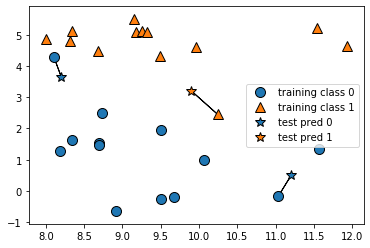

In [52]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Auch hier wird die Vorhersage als die Farbe des Kreuzes dargestellt. Sie können sehen, dass die Vorhersage für den neuen Datenpunkt oben links nicht die gleiche ist wie die Vorhersage, wenn wir nur einen Nachbarn verwendet haben. Während es sich bei dieser Darstellung um ein binäres Klassifizierungsproblem handelt, kann diese Methode auf Datensätze mit beliebig vielen Klassen angewendet werden. Für weitere Klassen zählen wir, wie viele Nachbarn zu jeder Klasse gehören und prognostizieren erneut die häufigste Klasse. Nun schauen wir uns an, wie wir den k-nearest neighbors Algorithmus mit scikitlearn anwenden können. Zuerst teilen wir unsere Daten in ein Training und einen Testsatz auf, damit wir die Generalisierungsleistung bewerten können, wie in Kapitel 1 beschrieben:

In [53]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Als nächstes importieren und instanziieren wir die Klasse. In diesem Fall können wir Parameter einstellen, wie z.B. die Anzahl der zu verwendenden Nachbarn. Hier haben wir es auf 3 gesetzt:

In [54]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Nun montieren wir den Klassifikator mit dem Trainingsset. Für KNeighborsClassifier bedeutet dies, dass der Datensatz gespeichert wird, so dass wir Nachbarn während der Vorhersage berechnen können:

In [55]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Um Vorhersagen über die Testdaten zu treffen, nennen wir die Vorhersagemethode. Für jeden Datenpunkt im Testsatz berechnet dieser seine nächsten Nachbarn im Trainingssatz und findet die häufigste Klasse unter diesen: 

In [56]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


Um zu beurteilen, wie gut unser Modell verallgemeinert, können wir die Score-Methode mit den Testdaten zusammen mit den Testlabels aufrufen:


In [57]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


 Wir sehen, dass unser Modell etwa 86% genau ist, was bedeutet, dass das Modell die Klasse für 86% der Proben im Testdatensatz korrekt vorhergesagt hat.


Analyse des KNeighborsClassifiers 

Für zweidimensionale Datensätze können wir auch die Vorhersage für alle möglichen Testpunkte in der xy-Ebene darstellen. Wir färben die Ebene nach der Klasse ein, die einem Punkt in dieser Region zugeordnet würde. Dies ermöglicht es uns, die Entscheidungsgrenze zu betrachten, die die Kluft zwischen der Zuordnung der Klasse 0 durch den Algorithmus und der Zuordnung der Klasse 1 darstellt.  Der folgende Code erzeugt die Visualisierungen der Entscheidungsgrenzen für einen, drei und neun Nachbarn, wie in Abbildung 2-6 dargestellt:

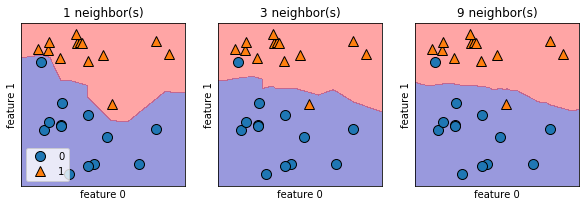

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc=3)

Abbildung  2-6. Entscheidungsgrenzen, die durch das nächstgelegene Nachbarmodell für verschiedene Werte von n_neighbors erstellt wurden.

Wie Sie links in der Abbildung sehen können, führt die Verwendung eines einzelnen Nachbarn zu einer Entscheidungsgrenze, die den Trainingsdaten genau folgt. Die Berücksichtigung von immer mehr Nachbarn führt zu einer glatteren Entscheidungsgrenze. Eine glattere Grenze entspricht einem einfacheren Modell. Mit anderen Worten, die Verwendung weniger Nachbarn entspricht einer hohen Modellkomplexität (wie auf der rechten Seite von Abbildung 2-1 dargestellt), und die Verwendung vieler Nachbarn entspricht einer geringen Modellkomplexität (wie auf der linken Seite von Abbildung 2-1 dargestellt). Betrachtet man den Extremfall, dass die Anzahl der Nachbarn die Anzahl aller Datenpunkte im Trainingsset ist, so hätte jeder Testpunkt genau die gleichen Nachbarn (alle Trainingspunkte) und alle Vorhersagen wären die gleichen: die Klasse, die im Trainingsset am häufigsten ist.

Lassen Sie uns untersuchen, ob wir den Zusammenhang zwischen Modellkomplexität und Verallgemeinerung, den wir bereits besprochen haben, bestätigen können. Wir werden dies auf der Grundlage des realen Datensatzes Brustkrebs tun. Wir beginnen damit, den Datensatz in ein Training und ein Testset aufzuteilen. Dann werten wir das Training aus und testen die Leistung des Sets mit einer unterschiedlichen Anzahl von Nachbarn. Die Ergebnisse sind in Abbildung 2-7 dargestellt:

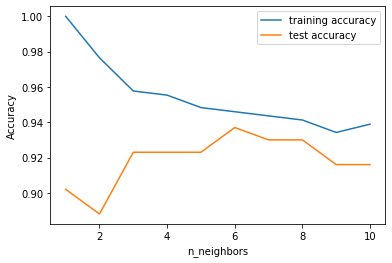

In [51]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Lassen Sie uns untersuchen, ob wir den Zusammenhang zwischen Modellkomplexität und Verallgemeinerung, den wir bereits besprochen haben, bestätigen können. Wir werden dies auf der Grundlage des realen Datensatzes Brustkrebs tun. Wir beginnen damit, den Datensatz in ein Training und ein Testset aufzuteilen. Dann werten wir das Training aus und testen die Leistung des Sets mit einer unterschiedlichen Anzahl von Nachbarn. Die Ergebnisse sind in Abbildung 2-7 dargestellt:

k-neighbors Regression 

Es gibt auch eine Regressionsvariante des k-nearest neighbors Algorithmus. Auch hier beginnen wir mit der Verwendung des einzelnen nächsten Nachbarn, diesmal mit dem Wellendatensatz. Wir haben drei Testdatenpunkte als grüne Sterne auf der x-Achse hinzugefügt. Die Vorhersage mit einem einzelnen Nachbarn ist nur der Zielwert des nächsten Nachbarn. Diese sind in Abbildung 2-8 als blaue Sterne dargestellt:


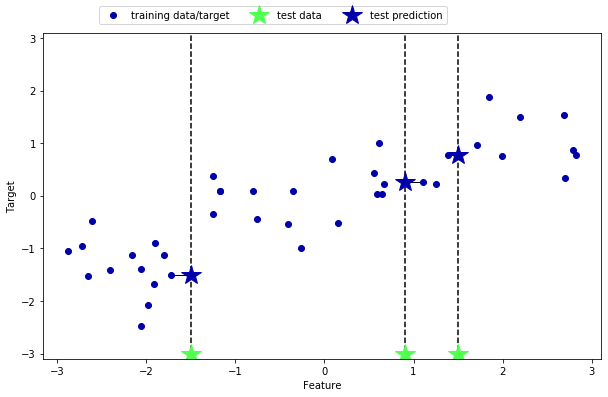

In [53]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

Abbildung 2-8. Vorhersagen der Ein-Neighbor-Regression auf dem Wellendatensatz   

Auch hier können wir mehr als den einzelnen nächsten Nachbarn für die Regression verwenden. Bei der Verwendung
mehrere nächstgelegene Nachbarn, die Vorhersage ist der Durchschnitt oder Mittelwert der relevanten Nachbarn (Abbildung 2-9):

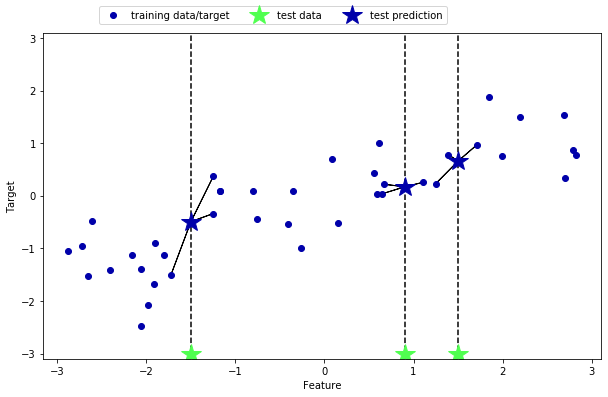

In [55]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

Abbildung 2-9. Vorhersagen der Regression von drei Nachbarn auf dem Wellendatensatz

Der k-nearest neighbors Algorithmus für die Regression ist in der KNeighbors Regressor Klasse im scikit-learn implementiert. Es wird ähnlich wie der KNeighborsClassifier verwendet:

In [56]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

Jetzt können wir Vorhersagen über den Testsatz machen:

In [57]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


Wir können das Modell auch mit der Score-Methode bewerten, die für Regressoren Folgendes zurückgibt
die R2-Punktzahl. Der R2-Wert, auch bekannt als der Bestimmtheitsmaßstab, ist ein Maß dafür.
der Güte einer Vorhersage für ein Regressionsmodell und ergibt eine Punktzahl zwischen 0
und 1. ein Wert von 1 entspricht einer perfekten Vorhersage, und ein Wert von 0 entspricht einer perfekten Vorhersage.
zu einem konstanten Modell, das nur den Mittelwert der Antworten der Trainingssätze vorhersagt, y_train:

In [58]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


Hier liegt die Punktzahl bei 0,83, was auf eine relativ gute Modellpassung hinweist.

Analysieren des KNeighborsRegressors

Für unseren eindimensionalen Datensatz können wir sehen, wie die Prognosen für alle möglichen Merkmalswerte aussehen (Abbildung 2-10). Dazu erstellen wir einen Testdatensatz, der aus vielen Punkten auf der Linie besteht:

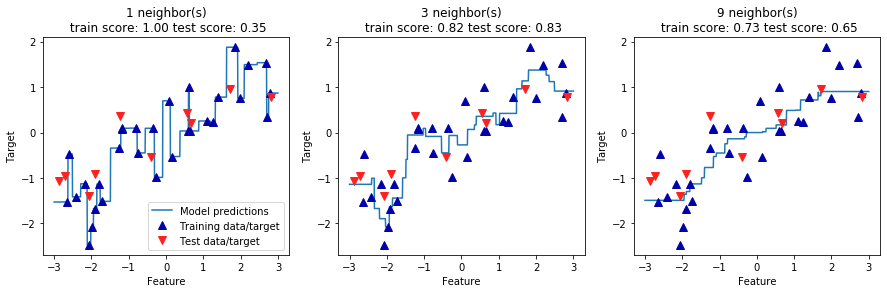

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
"Test data/target"], loc="best")

Abbildung 2-10. Vergleich von Vorhersagen der Regression der nächsten Nachbarn für verschiedene Werte von n_neighbors

Wie wir aus dem Diagramm ersehen können, hat jeder Punkt im Trainingssatz mit nur einem einzigen Nachbarn einen offensichtlichen Einfluss auf die Vorhersagen, und die vorhergesagten Werte durchlaufen alle Datenpunkte. Dies führt zu einer sehr instabilen Vorhersage. Die Berücksichtigung von mehr Nachbarn führt zu glatteren Vorhersagen, aber diese passen nicht auch zu den Trainingsdaten.

Stärken, Schwächen und Parameter 
 
Im Prinzip gibt es zwei wichtige Parameter für den KNeighbors Klassifikator: die Anzahl der Nachbarn und wie Sie den Abstand zwischen den Datenpunkten messen. In der Praxis funktioniert die Verwendung einer kleinen Anzahl von Nachbarn wie drei oder fünf oft gut, aber Sie sollten diesen Parameter unbedingt anpassen. Die Wahl des richtigen Abstandsmaßes geht etwas über den Rahmen dieses Buches hinaus. Standardmäßig wird die euklidische Distanz verwendet, was in vielen Situationen gut funktioniert. Eine der Stärken von k-NN ist, dass das Modell sehr einfach zu verstehen ist und oft eine vernünftige Leistung ohne viele Anpassungen bietet. Die Verwendung dieses Algorithmus ist eine gute Grundlinienmethode, die Sie ausprobieren können, bevor Sie fortgeschrittenere Techniken in Betracht ziehen. Der Aufbau des Modells der nächsten Nachbarn ist in der Regel sehr schnell, aber wenn Ihr Trainingsset sehr groß ist (entweder in der Anzahl der Funktionen oder in der Anzahl der Proben), kann die Vorhersage langsam sein. Bei der Verwendung des k-NN-Algorithmus ist es wichtig, dass Sie Ihre Daten vorverarbeiten (siehe Kapitel 3). Dieser Ansatz funktioniert oft nicht gut bei Datensätzen mit vielen Merkmalen (Hunderte oder mehr), und er ist besonders schlecht bei Datensätzen, bei denen die meisten Merkmale meistens 0 sind (sogenannte spärliche Datensätze). Obwohl der Algorithmus der nächsten k-neighbors leicht zu verstehen ist, wird er in der Praxis nicht oft verwendet, da die Vorhersage langsam ist und viele Funktionen nicht beherrscht werden können. Die Methode, die wir als nächstes besprechen, hat keinen dieser Nachteile.

#### 2.4.2. Decision Trees
<a name="subsubparagraph2"></a> 

Entscheidungsbäume sind weit verbreitete Modelle für Klassifizierungs- und Regressionsaufgaben. Im Wesentlichen lernen sie eine Hierarchie von if/else Fragen, die zu einer Entscheidung führt. Diese Fragen sind ähnlich wie die Fragen, die Sie in einem Spiel mit 20 Fragen stellen könnten. Stellen Sie sich vor, Sie wollen zwischen den folgenden vier Tieren unterscheiden: Bären, Falken, Pinguine und Delfine. Ihr Ziel ist es, die richtige Antwort zu finden, indem Sie so wenig if/else Fragen wie möglich stellen. Du könntest damit beginnen, zu fragen, ob das Tier Federn hat, eine Frage, die deine möglichen Tiere auf nur zwei reduziert. Wenn die Antwort "ja" lautet, können Sie eine weitere Frage stellen, die Ihnen helfen könnte, zwischen Falken und Pinguinen zu unterscheiden. Zum Beispiel könnten Sie fragen, ob das Tier fliegen kann. Wenn das Tier keine Federn hat, sind Ihre möglichen Tierwahlen Delfine und Bären, und Sie müssen eine Frage stellen, um zwischen diesen beiden Tieren zu unterscheiden - zum Beispiel, ob das Tier Flossen hat. Diese Reihe von Fragen kann als Entscheidungsbaum ausgedrückt werden, wie in Abbildung 2-22 dargestellt.

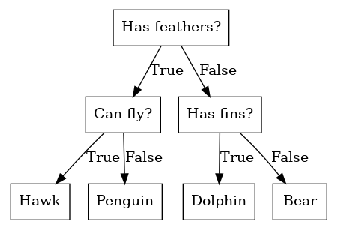

In [7]:
mglearn.plots.plot_animal_tree()

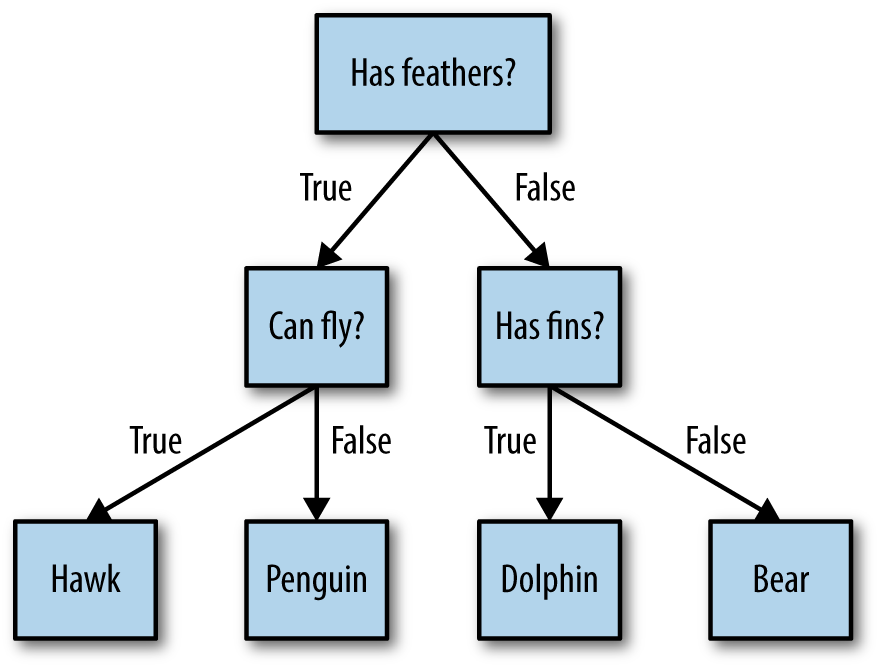

In dieser Abbildung stellt jeder Knoten im Baum entweder eine Frage oder einen Endknoten (auch Blatt genannt) dar, der die Antwort enthält. Die Kanten verbinden die Antworten auf eine Frage mit der nächsten Frage, die Sie stellen würden. Im maschinellen Lernen haben wir ein Modell entwickelt, um vier Klassen von Tieren (Falken, Pinguine, Delfine und Bären) mit den drei Merkmalen "hat Federn", "kann fliegen" und "hat Flossen" zu unterscheiden. Anstatt diese Modelle von Hand zu erstellen, können wir sie aus Daten lernen, indem wir sie unter Aufsicht lernen.

Aufbau von Entscheidungsbäumen Lassen Sie uns den Prozess der Erstellung eines Entscheidungsbaums für den in Abbildung 2-23 dargestellten 2D-Klassifikationsdatensatz durchlaufen. Der Datensatz besteht aus zwei Halbmondformen, wobei jede Klasse aus 75 Datenpunkten besteht. Wir werden diesen Datensatz als two_moons bezeichnen. Einen Entscheidungsbaum zu lernen bedeutet, die Reihenfolge der if/else Fragen zu lernen, die uns am schnellsten zur wahren Antwort bringt. In der Maschine lernenIn der Einstellung werden diese Fragen als Tests bezeichnet (nicht zu verwechseln mit dem Testset, das sind die Daten, mit denen wir testen, um zu sehen, wie verallgemeinerbar unser Modell ist).  Normalerweise kommen die Daten nicht in Form von binären Ja/Nein-Merkmalen wie im Tierbeispiel, sondern werden als kontinuierliche Merkmale dargestellt, wie im 2D-Datensatz in Abbildung 2-23. Die Tests, die an kontinuierlichen Daten verwendet werden, haben die Form "Ist das Merkmal i größer als der Wert a?".

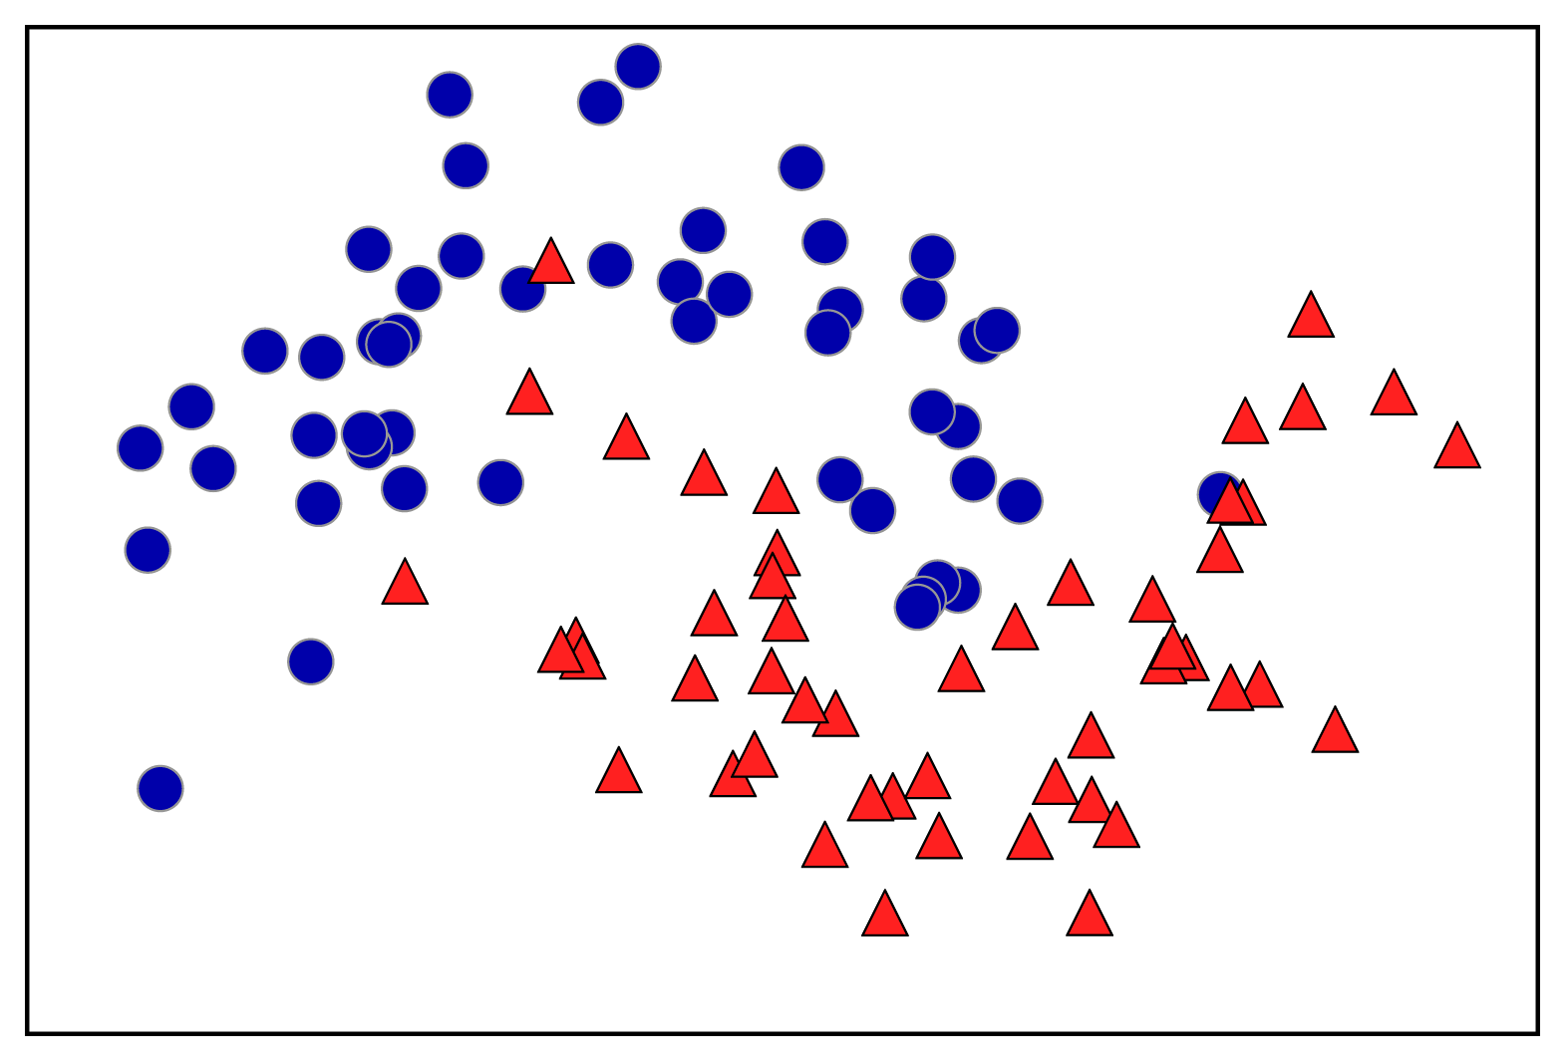

Abbildung 2-23. Zwei-Monde-Datensatz, auf dem der Entscheidungsbaum aufgebaut wird.

Um einen Baum zu erstellen, durchsucht der Algorithmus alle möglichen Tests und findet denjenigen, der am aussagekräftigsten über die Zielvariable ist. Abbildung 2-24 zeigt den ersten Test, der ausgewählt wurde. Die vertikale Aufteilung des Datensatzes bei x[1]=0,0596 ergibt die meisten Informationen; sie trennt am besten die Punkte in Klasse 1 von den Punkten in Klasse 2. Der oberste Knoten, auch Wurzel genannt, repräsentiert den gesamten Datensatz, bestehend aus 75 Punkten der Klasse 0 und 75 Punkten der Klasse 1. Die Aufteilung erfolgt durch Prüfung, ob x[1] <= 0,0596, angezeigt durch eine schwarze Linie. Wenn der Test wahr ist, wird dem linken Knoten ein Punkt zugewiesen, der 2 Punkte der Klasse 0 und 32 Punkte der Klasse 1 enthält. Andernfalls wird der Punkt dem rechten Knoten zugeordnet, der 48 Punkte der Klasse 0 und 18 Punkte der Klasse 1 enthält. Diese beiden Knoten entsprechen den in Abbildung 2-24 dargestellten oberen und unteren Bereichen. Obwohl die erste Aufteilung die Trennung der beiden Klassen gut gemacht hat, enthält der untere Bereich noch Punkte der Klasse 0 und der obere Bereich noch Punkte der Klasse 1. Wir können ein genaueres Modell erstellen, indem wir den Prozess der Suche nach dem besten Test in beiden Regionen wiederholen. Abbildung 2-25 zeigt, dass die aussagekräftigste nächste Aufteilung für den linken und rechten Bereich auf x[0] basiert.

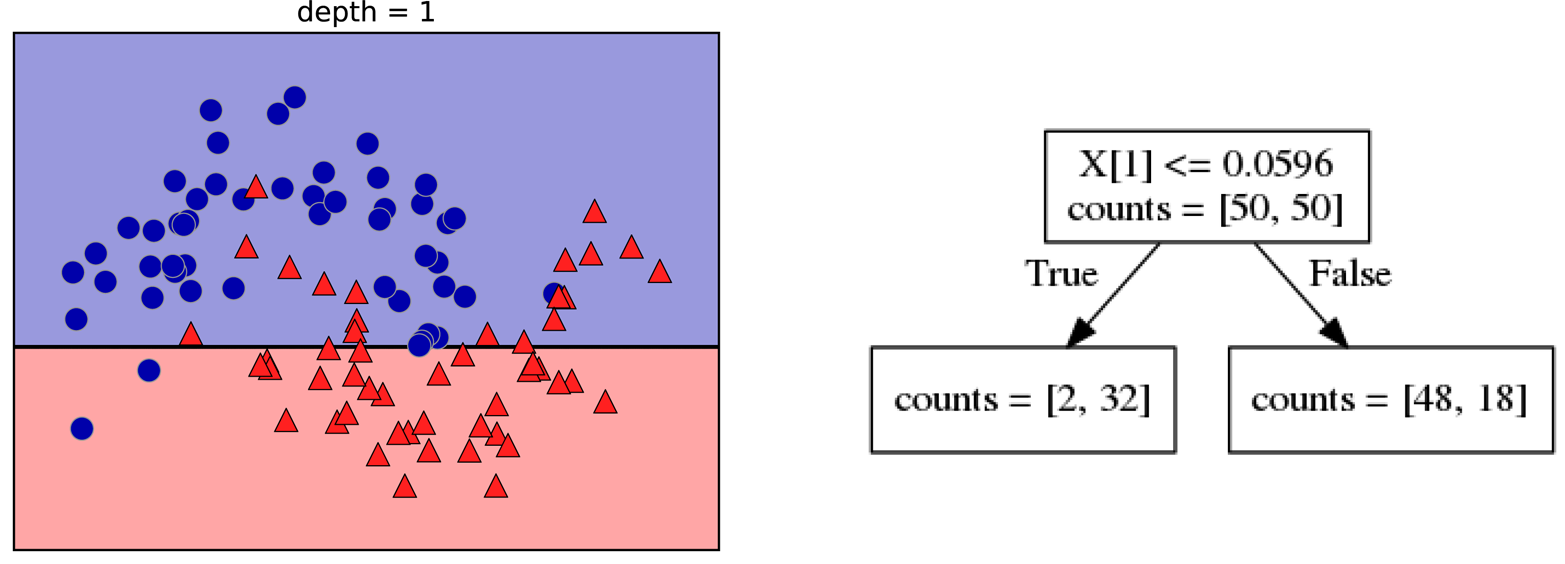

Abbildung 2-24. Entscheidungsgrenze des Baumes mit Tiefe 1 (links) und entsprechendem Baum (rechts)

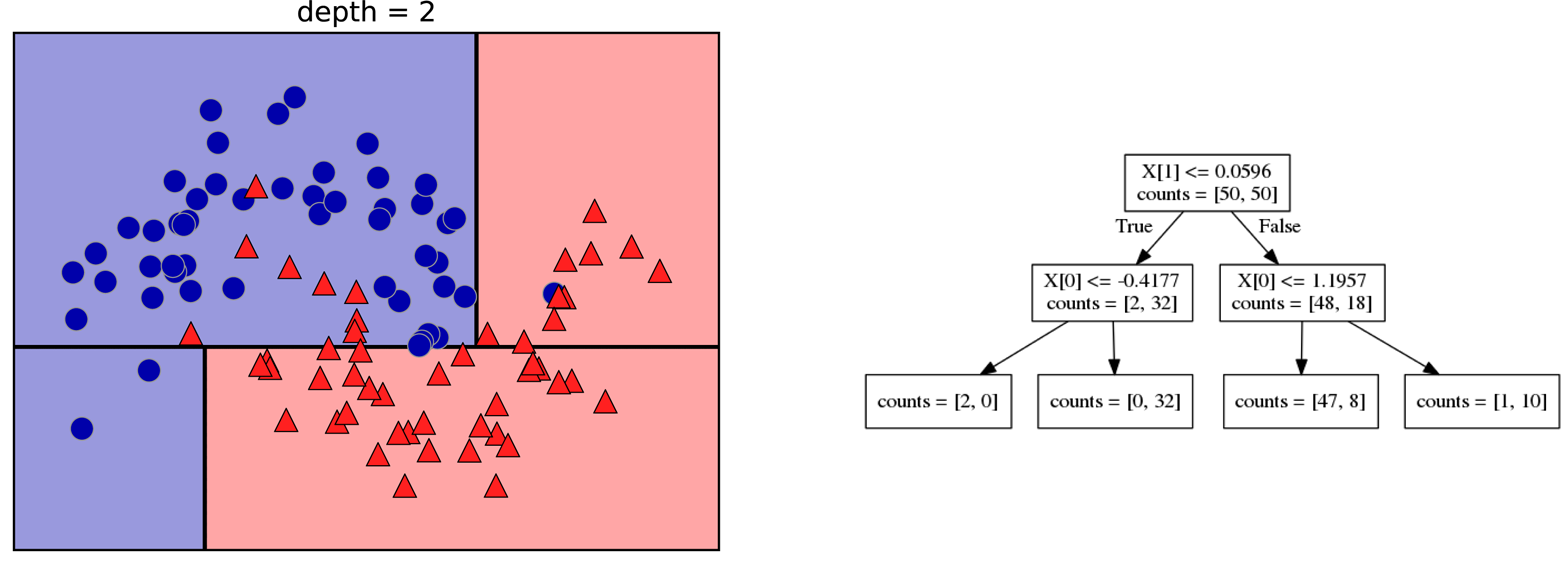

Abbildung 2-25. Entscheidungsgrenze des Baumes mit Tiefe 2 (links) und entsprechende Entscheidung
Baum (rechts)

Dieser rekursive Prozess liefert einen binären Entscheidungsbaum, wobei jeder Knoten einen Test enthält. Alternativ können Sie sich jeden Test auch so vorstellen, dass er den Teil der Daten, der derzeit betrachtet wird, entlang einer Achse aufteilt. Dies ergibt eine Ansicht des Algorithmus als Aufbau einer hierarchischen Partition. Da jeder Test nur ein einzelnes Merkmal betrifft, weisen die Bereiche in der resultierenden Partition immer achsparallele Grenzen auf. Die rekursive Partitionierung der Daten wird so lange wiederholt, bis jeder Bereich in der Partition (jedes Blatt im Entscheidungsbaum) nur noch einen einzigen Zielwert (eine einzelne Klasse oder ein einzelner Regressionswert) enthält. Ein Blatt des Baumes, das Datenpunkte enthält, die alle den gleichen Zielwert haben, wird als rein bezeichnet. Die endgültige Partitionierung für diesen Datensatz ist in Abbildung 2-26 dargestellt.

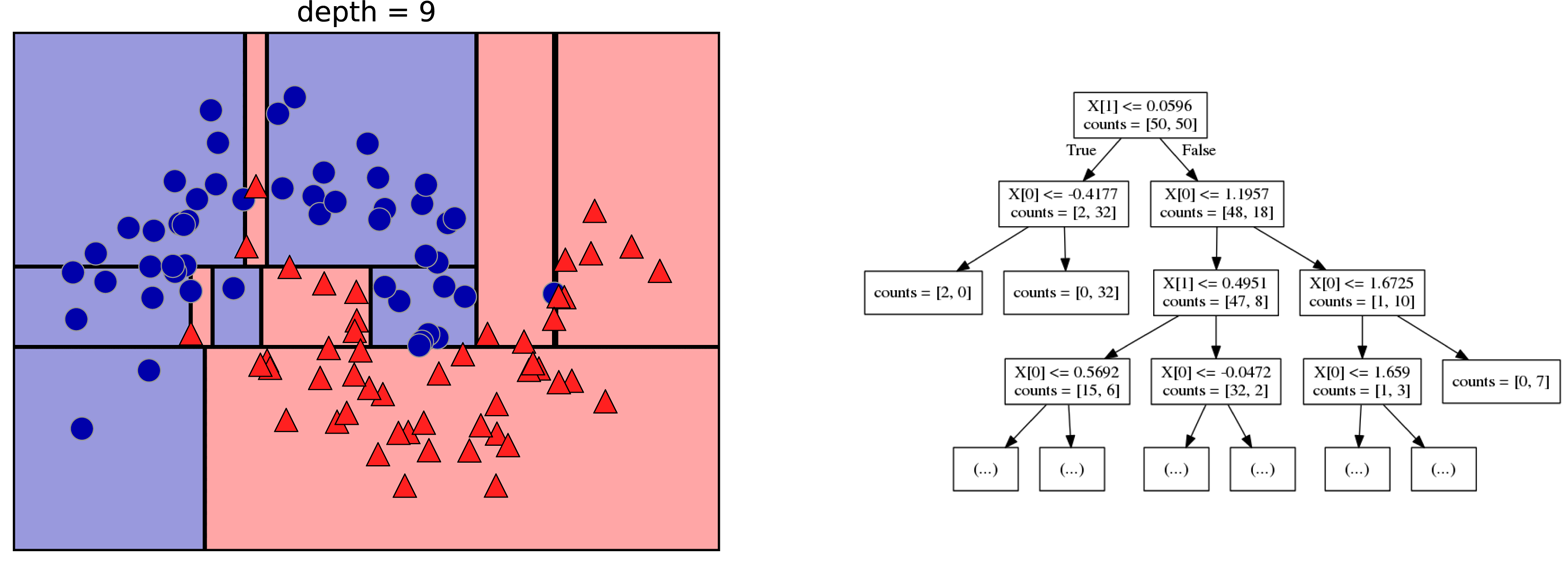

Abbildung 2-26. Entscheidungsgrenze des Baumes mit der Tiefe 9 (links) und einem Teil des entsprechenden Baumes (rechts); der gesamte Baum ist ziemlich groß und schwer zu visualisieren.

Eine Vorhersage für einen neuen Datenpunkt wird durchgeführt, indem überprüft wird, in welchem Bereich der Partition des Merkmalsraums der Punkt liegt, und dann das Mehrheitsziel (oder das einzelne Ziel im Falle reiner Blätter) in diesem Bereich vorhergesagt wird. Der Bereich kann gefunden werden, indem man den Baum von der Wurzel durchläuft und nach links oder rechts geht, je nachdem, ob der Test erfüllt ist oder nicht. Es ist auch möglich, Bäume für Regressionsaufgaben mit genau der gleichen Technik zu verwenden. Um eine Vorhersage zu machen, durchlaufen wir den Baum basierend auf den Tests in jedem Knoten und finden das Blatt, in das der neue Datenpunkt fällt. Die Ausgabe für diesen Datenpunkt ist das mittlere Ziel der Trainingspunkte in diesem Blatt.

Kontrolle der Komplexität von Entscheidungsbäumen

Typischerweise, wie hier beschrieben, einen Baum bauen und weitermachen, bis alle Blätter rein sind.
führt zu Modellen, die sehr komplex sind und die den Trainingsdaten sehr ähnlich sind. Die
Das Vorhandensein von reinen Blättern bedeutet, dass ein Baum 100%ig genau auf das Trainingsset abgestimmt ist.
Datenpunkt im Trainingssatz ist in einem Blatt, das die richtige Mehrheitsklasse hat. Die Überfindung
ist links in Abbildung 2-26 zu sehen. Sie können die Regionen sehen, die für die folgenden Bereiche bestimmt sind
zur Klasse 1 in der Mitte aller Punkte der Klasse 0 gehören. Andererseits
Hand, gibt es einen kleinen Streifen, der als Klasse 0 vorhergesagt wird, um den Punkt, der zur Klasse 0 gehört.
ganz rechts. So würde man sich die Entscheidungsgrenze nicht vorstellen,
und die Entscheidungsgrenze konzentriert sich sehr stark auf einzelne Ausreißerpunkte, die weit entfernt sind.
von den anderen Punkten in dieser Klasse.
Es gibt zwei gemeinsame Strategien, um eine Überbelegung zu verhindern: die Beendigung der Erstellung des
Baum früh (auch Pre-Priming genannt), oder den Baum bauen, aber dann entfernen oder kollabieren.
Knoten, die wenig Informationen enthalten (auch als Post-Priming oder Just-Priming bezeichnet).
Mögliche Kriterien für den Vorschnitt sind die Begrenzung der maximalen Tiefe des Baumes,
Begrenzung der maximalen Anzahl der Blätter oder Anforderung einer minimalen Anzahl von Punkten
in einem Knoten, um ihn immer wieder aufzuteilen.

Entscheidungsbäume in scikit-learn werden im DecisionTreeRegressor implementiert und
DecisionTreeClassifier-Klassen. scikit-learn implementiert nur Pre-Priming, nicht aber Pre-Priming.
nach dem Schnitt.
Betrachten wir den Effekt des Pre-Primings im Detail auf den Datensatz Brustkrebs. Als
immer importieren wir den Datensatz und teilen ihn in ein Training und einen Testteil auf. Dann bauen wir
ein Modell mit der Standardeinstellung der vollständigen Entwicklung des Baums (Wachsen des Baums bis zum
alle Blätter sind rein). Wir fixieren den random_state im Baum, der für den Tiebreaking verwendet wird.
intern:

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


Wie erwartet, beträgt die Genauigkeit des Trainingssets 100% - da die Blätter rein sind, wurde der Baum so tief gezüchtet, dass er alle Etiketten auf den Trainingsdaten perfekt speichern konnte. Die Genauigkeit des Testsets ist etwas schlechter als bei den zuvor betrachteten linearen Modellen, die eine Genauigkeit von etwa 95% aufwiesen. Wenn wir die Tiefe eines Entscheidungsbaums nicht einschränken, kann der Baum beliebig tief und komplex werden. Nicht beschnittene Bäume sind daher anfällig für Überfektionen und verallgemeinern sich nicht gut mit neuen Daten. Nun wenden wir das Pre-Priming auf den Baum an, wodurch die Entwicklung des Baumes eingestellt wird, bevor wir perfekt zu den Trainingsdaten passen. Eine Möglichkeit besteht darin, den Bau des Baumes nach Erreichen einer bestimmten Tiefe zu stoppen. Hier setzen wir max_depth=4, d.h. es können nur vier aufeinanderfolgende Fragen gestellt werden (vgl. Abbildungen 2-24 und 2-26). Die Begrenzung der Tiefe des Baumes verringert die Überfischung. Dies führt zu einer geringeren Genauigkeit des Trainingssets, aber zu einer Verbesserung des Testsets:


In [20]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


Analyse von Entscheidungsbäumen 

Wir können den Baum mit der Funktion export_graphviz aus dem Baummodul visualisieren. Dabei wird eine Datei im.dot-Dateiformat geschrieben, einem Textdateiformat zum Speichern von Grafiken. Wir setzen eine Option, um die Knoten so einzufärben, dass sie die Mehrheitsklasse in jedem Knoten widerspiegeln und übergeben die Klassen- und Funktionsnamen, damit der Baum ordnungsgemäß beschriftet werden kann:

In [23]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

 Wir können diese Datei lesen und visualisieren, wie in Abbildung 2-27 gezeigt, mit dem Modul graphviz (oder Sie können jedes Programm verwenden, das .dot-Dateien lesen kann):

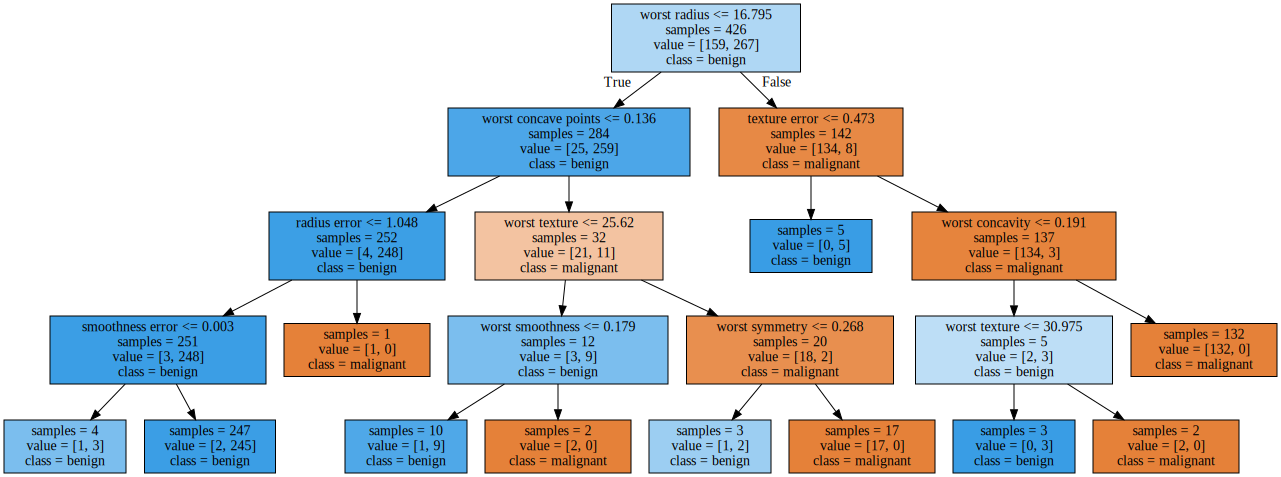

In [24]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

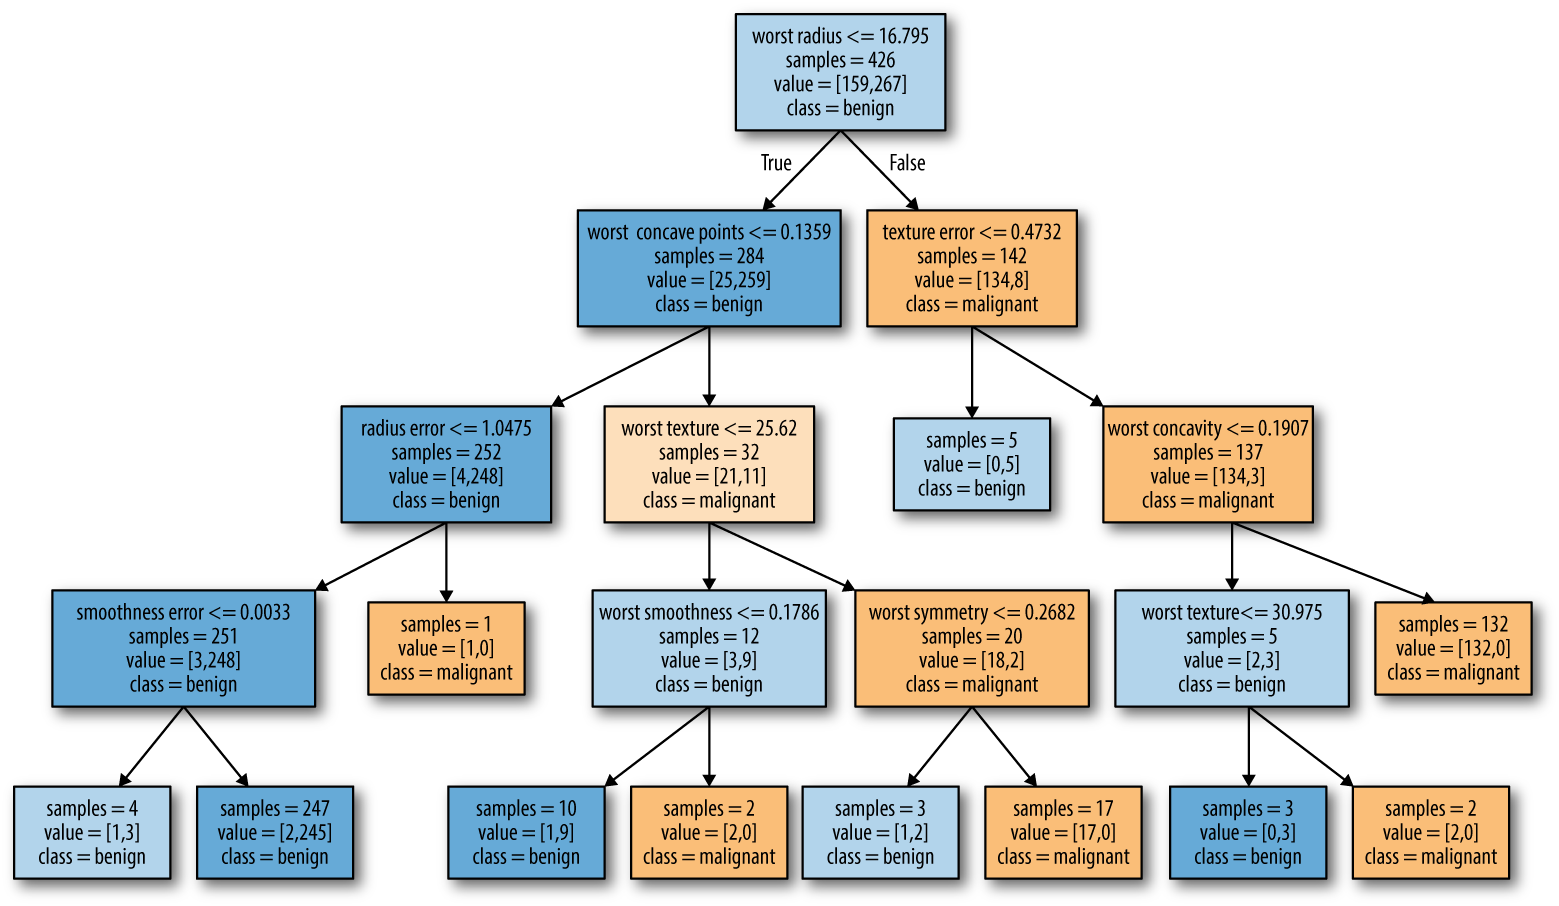


Abbildung 2-27. Visualisierung des Entscheidungsbaums, der auf dem Datensatz Brustkrebs basiert. 

Die Visualisierung des Baumes bietet einen großartigen Einblick in die Art und Weise, wie der Algorithmus Vorhersagen macht, und ist ein gutes Beispiel für einen maschinellen Lernalgorithmus, der für Laien leicht verständlich ist. Doch selbst bei einem Baum der Tiefe vier, wie hier zu sehen, kann der Baum etwas überwältigend werden. Tiefere Bäume (eine Tiefe von 10 ist nicht ungewöhnlich) sind noch schwerer zu erfassen. Eine Methode, um den Baum zu inspizieren, die hilfreich sein kann, ist es, herauszufinden, welchen Weg die meisten Daten tatsächlich nehmen. Die in jedem Knoten in Abbildung 2-27 dargestellten n_Samples geben die Anzahl der Samples in diesem Knoten an, während value die Anzahl der Samples pro Klasse angibt. Den Zweigen rechts folgend, sehen wir, dass der schlimmste Radius <= 16.795 einen Knoten erzeugt, der nur 8 gutartige, aber 134 maligne Proben enthält. Der Rest dieser Seite des Baumes verwendet dann einige feinere Unterscheidungen, um diese 8 verbleibenden gutartigen Proben abzutrennen. Von den 142 Proben, die beim ersten Split nach rechts gingen, landen fast alle (132) in dem Blatt ganz rechts. Wenn wir an der Wurzel nach links gehen, erhalten wir für den schlimmsten Radius > 16.795 25 maligne und 259 gutartige Proben. Fast alle gutartigen Proben landen im zweiten Blatt von rechts, die meisten anderen Blätter enthalten nur sehr wenige Proben.

Feature-Bedeutung in Bäumen Anstatt den gesamten Baum zu betrachten, kann man sagen.
n der Besteuerung, gibt es einige nützliche Eigenschaften, die wir ableiten können, um die Funktionsweise des Baumes zusammenzufassen. Die am häufigsten verwendete Zusammenfassung ist die Feature Wichtigkeit, die angibt, wie wichtig jedes Feature für die Entscheidung ist, die ein Baum trifft. Es ist eine Zahl zwischen 0 und 1 für jedes Merkmal, wobei 0 "überhaupt nicht verwendet" und 1 "perfekt das Ziel voraussagt" bedeutet. Die Feature-Importe summieren sich immer auf 1:

In [26]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


Wir können die Feature-Importe auf eine Weise visualisieren, die derjenigen ähnelt, die wir visualisieren.
die Koeffizienten im linearen Modell (Abbildung 2-28):

In [32]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

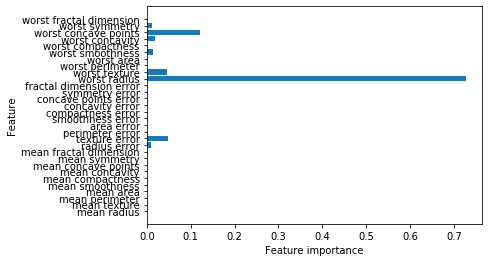

In [33]:
plot_feature_importances_cancer(tree)

Abbildung 2-28. Feature-Importe, die aus einem Entscheidungsbaum berechnet wurden, der im Datensatz Brustkrebs gelernt wurde.

Hier sehen wir, dass das Merkmal, das im oberen Split verwendet wird ("schlimmster Radius"), bei weitem das wichtigste Merkmal ist. Dies bestätigt unsere Beobachtung bei der Analyse des Baumes, dass die erste Ebene die beiden Klassen bereits recht gut trennt. Wenn ein Merkmal jedoch eine geringe feature_importance hat, bedeutet das nicht, dass dieses Merkmal uninformativ ist. Es bedeutet nur, dass das Merkmal nicht vom Baum ausgewählt wurde, wahrscheinlich weil ein anderes Merkmal die gleichen Informationen kodiert. Im Gegensatz zu den Koeffizienten in linearen Modellen sind Merkmalsimporte immer positiv und kodieren nicht, welche Klasse ein Merkmal anzeigt. Die Feature-Importe zeigen uns, dass der "schlimmste Radius" wichtig ist, aber nicht, ob ein hoher Radius darauf hinweist, dass eine Probe gutartig oder bösartig ist. Tatsächlich gibt es vielleicht keine so einfache Beziehung zwischen Merkmalen und Klasse, wie Sie im folgenden Beispiel sehen können (Abbildungen 2-29 und 2-30):

Feature importances: [0. 1.]


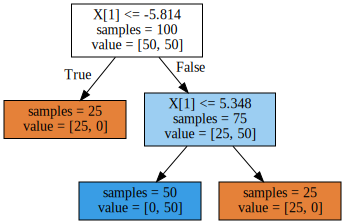

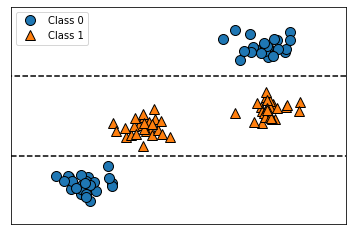

In [34]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Abbildung 2-29. Zweidimensionaler Datensatz, in dem das Merkmal auf der y-Achse eine nicht-monotone Beziehung zum Klassenlabel und den von einem Entscheidungsbaum gefundenen Entscheidungsgrenzen hat. Entscheidungsbaum gelernt auf der Grundlage der in Abbildung 2-29 dargestellten Daten

Die Darstellung zeigt einen Datensatz mit zwei Merkmalen und zwei Klassen. Hier sind alle Informationen in X[1] enthalten, und X[0] wird überhaupt nicht verwendet. Aber die Beziehung zwischen X[1] und der Ausgangsklasse ist nicht monoton, d.h. wir können nicht sagen: "Ein hoher Wert von X[0] bedeutet Klasse 0, und ein niedriger Wert bedeutet Klasse 1" (oder umgekehrt). Während wir unsere Diskussion hier auf Entscheidungsbäume für die Klassifizierung konzentriert haben, gilt alles, was gesagt wurde, auch für Entscheidungsbäume für die Regression, wie sie in Decision TreeRegressor implementiert sind. Die Verwendung und Analyse von Regressionsbäumen ist sehr ähnlich wie bei Klassifikationsbäumen. Es gibt jedoch eine besondere Eigenschaft der Verwendung von baumbasierten Modellen für die Regression, die wir hervorheben möchten. Der DecisionTreeRegressor (und alle anderen baumbasierten Regressionsmodelle) sind nicht in der Lage, Extrapolationen durchzuführen oder Vorhersagen außerhalb des Bereichs der Trainingsdaten zu treffen. Lassen Sie uns das genauer untersuchen, indem wir einen Datensatz mit Preisen für historischen Computerspeicher (RAM) verwenden. Abbildung 2-31 zeigt den Datensatz mit dem Datum auf der x-Achse und dem Preis von einem Megabyte RAM in diesem Jahr auf der y-Achse:

Text(0, 0.5, 'Price in $/Mbyte')

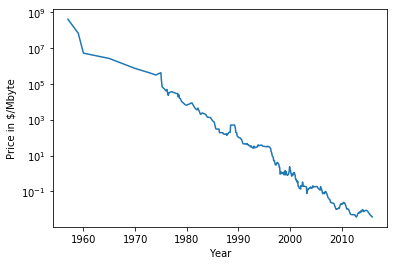

In [47]:
import pandas as pd
ram_prices = pd.read_csv("data/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

Abbildung 2-31. Historische Entwicklung des RAM-Preises, dargestellt auf einer Log-Skala.

 Beachten Sie die logarithmische Skala der y-Achse. Bei der logarithmischen Darstellung scheint die Beziehung ziemlich linear zu sein und sollte daher bis auf einige Unebenheiten relativ einfach vorherzusagen sein. Wir werden eine Prognose für die Jahre nach 2000 auf der Grundlage der historischen Daten bis zu diesem Zeitpunkt erstellen, wobei das Datum unser einziges Merkmal ist. Wir werden zwei einfache Modelle vergleichen: einen DecisionTreeRegressor und eine LinearRegression. Wir skalieren die Preise mit einem Logarithmus, so dass die Beziehung relativ linear ist. Dies macht für den DecisionTreeRegressor keinen Unterschied, aber für die LinearRegression einen großen Unterschied (wir werden dies in Kapitel 4 näher erläutern). Nachdem wir die Modelle trainiert und Vorhersagen getroffen haben, wenden wir die Exponential Map an, um die Logarithmus-Transformation rückgängig zu machen. Wir machen hier Vorhersagen über den gesamten Datensatz zu Visualisierungszwecken, aber für eine quantitative Auswertung würden wir nur den Testdatensatz berücksichtigen:


In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Abbildung 2-32, die hier erstellt wurde, vergleicht die Vorhersagen des Entscheidungsbaums und des linearen Regressionsmodells mit der Grundwahrheit:

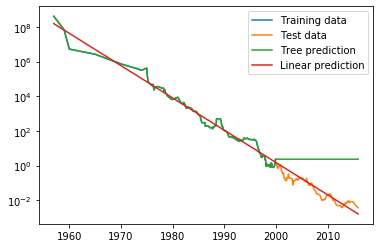

In [53]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

Abbildung 2-32. Vergleich von Vorhersagen eines linearen Modells und Vorhersagen eines Regressionsbaums auf den RAM-Preisdaten

Der Unterschied zwischen den Modellen ist sehr auffällig. Das lineare Modell nähert sich den Daten mit einer Linie, wie wir es wussten. Diese Linie liefert eine recht gute Prognose für die Testdaten (die Jahre nach 2000), während einige der feineren Variationen sowohl der Trainings- als auch der Testdaten überlagert werden. Das Baummodell hingegen liefert perfekte Vorhersagen über die Trainingsdaten; wir haben die Komplexität des Baums nicht eingeschränkt, so dass es den gesamten Datensatz auswendig gelernt hat. Sobald wir jedoch den Datenbereich verlassen, für den das Modell Daten hat, prognostiziert das Modell einfach immer wieder den letzten bekannten Punkt. Der Baum hat keine Möglichkeit, "neue" Antworten zu generieren, außerhalb dessen, was in den Trainingsdaten zu sehen war. Dieser Mangel gilt für alle Modelle, die auf Bäumen basieren.

Stärken, Schwächen und Parameter 

Wie bereits erwähnt, sind die Parameter, die die Modellkomplexität in Entscheidungsbäumen steuern, die Pre-Priming-Parameter, die den Aufbau des Baumes stoppen, bevor er vollständig entwickelt ist. Normalerweise wird eine der folgenden Strategien gewählt: entweder max_depth, max_leaf_nodes, max_leaf_nodes oder 
min_Proben_Blatt - ist ausreichend, um eine Überbestückung zu vermeiden. Entscheidungsbäume haben gegenüber vielen der bisher diskutierten Algorithmen zwei Vorteile: Das resultierende Modell kann von Laien leicht visualisiert und verstanden werden (zumindest für kleinere Bäume), und die Algorithmen sind völlig unabhängig von der Skalierung der Daten. Da jedes Merkmal separat verarbeitet wird und die möglichen Aufteilungen der Daten nicht von der Skalierung abhängen, ist für Entscheidungsbaumalgorithmen keine Vorverarbeitung wie Normalisierung oder Standardisierung der Merkmale erforderlich. Insbesondere Entscheidungsbäume funktionieren gut, wenn Sie Features haben, die auf völlig unterschiedlichen Skalen liegen, oder eine Mischung aus binären und kontinuierlichen Features. Der größte Nachteil von Entscheidungsbäumen ist, dass sie selbst bei Verwendung von Pre-Priming dazu neigen, sich zu überholen und eine schlechte Generalisierungsleistung zu erbringen. Daher werden in den meisten Anwendungen die Ensemble-Methoden, die wir als nächstes besprechen, normalerweise anstelle eines einzigen Entscheidungsbaums verwendet.

#### 2.4.3. Lineare Modelle
<a name="subsubparagraph2"></a> 

Lineare Modelle sind eine Klasse von Modellen, die in der Praxis weit verbreitet sind und in den letzten Jahrzehnten intensiv untersucht wurden, deren Wurzeln über hundert Jahre zurückreichen. Lineare Modelle machen eine Vorhersage mit einer linearen Funktion der Eingangsmerkmale, die wir in Kürze erläutern werden.

Lineare Modelle für die Regression

Für die Regression sieht die allgemeine Vorhersageformel für ein lineares Modell wie folgt aus:

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

Hier bezeichnet x[0] bis x[p] die Merkmale (in diesem Beispiel ist die Anzahl der Merkmale p) eines einzelnen Datenpunktes, w und b sind Parameter des erlernten Modells, und ŷ ist die Vorhersage, die das Modell macht. Für einen Datensatz mit einem einzelnen Merkmal heißt das:

ŷ = w[0] * x[0] + b

an die Sie sich vielleicht von der Mathematik der High School als Gleichung für eine Linie erinnern. Hier ist w[0] die Steigung und b der Offset der y-Achse. Für weitere Merkmale enthält w die Neigungen entlang jeder Merkmalsachse. Alternativ können Sie sich die vorhergesagte Antwort auch als eine gewichtete Summe der Eingabemerkmale vorstellen, wobei die Gewichte (die negativ sein können) durch die Eingaben von w gegeben sind.

Der Versuch, die Parameter w[0] und b auf unserem eindimensionalen Wellendatensatz zu lernen, könnte zu folgender Zeile führen (siehe Abbildung 2-11):

w[0]: 0.393906  b: -0.031804


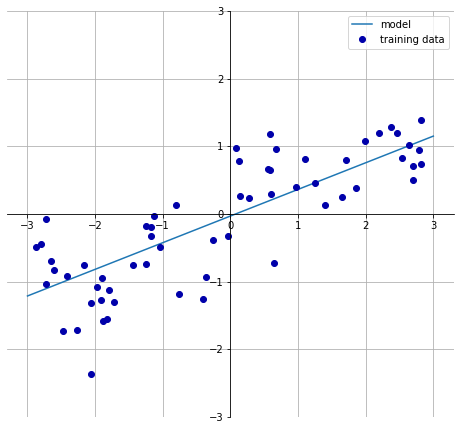

In [64]:
mglearn.plots.plot_linear_regression_wave()

In [ ]:
Abbildung 2-11. Vorhersagen eines linearen Modells auf dem Wave-Datensatz

Wir haben ein Koordinatenkreuz in die Darstellung eingefügt, um das Verständnis der Linie zu erleichtern.
Wenn wir w[0] betrachten, sehen wir, dass die Steigung um 0,4 liegen sollte, was wir bestätigen können.
visuell in der Handlung. Der Schnittpunkt ist der Bereich, in dem die Vorhersagelinie die y-Achse kreuzen sollte:
Dies ist etwas unter Null, was Sie auch im Bild bestätigen können.
Lineare Modelle für die Regression können als Regressionsmodelle charakterisiert werden, bei denen die
Die Vorhersage ist eine Linie für ein einzelnes Merkmal, eine Ebene bei Verwendung von zwei Merkmalen oder eine Hyperebene.
in höheren Dimensionen (d.h. bei Verwendung mehrerer Features).
Wenn Sie die Vorhersagen der Geraden mit denen der
KNeighborsRegressor in Abbildung 2-10, die Verwendung einer geraden Linie zur Vorhersage von Vorhersagen scheint möglich zu sein.
sehr restriktiv. Es sieht so aus, als ob alle feinen Details der Daten verloren gehen. In gewisser Weise ist dies
wahr. Es ist eine starke (und etwas unrealistische) Annahme, dass unser Ziel y ein linearer ist.
Kombination der Merkmale. Aber wenn man sich eindimensionale Daten ansieht, ergibt sich eine gewisse
verzerrte Perspektive. Für Datensätze mit vielen Funktionen können lineare Modelle sehr leistungsfähig sein.
Insbesondere, wenn Sie mehr Funktionen als Trainingsdatenpunkte haben, können Sie jedes Ziel erreichen.
kann (am Trainingsset) als lineare Funktion perfekt modelliert werden.6
Es gibt viele verschiedene lineare Modelle für die Regression. Der Unterschied zwischen diesen
Modelle liegt darin, wie die Modellparameter w und b aus den Trainingsdaten gelernt werden,
und wie die Modellkomplexität kontrolliert werden kann. Wir werden nun einen Blick auf die besten
beliebte lineare Modelle für die Regression.

Lineare Regression (auch bekannt als gewöhnliche Least Squares)

Die lineare Regression, oder gewöhnliche kleinste Quadrate (OLS), ist die einfachste und klassischste lineare Methode der Regression. Die lineare Regression findet die Parameter w und b, die den mittleren quadratischen Fehler zwischen Vorhersagen und den wahren Regressionszielen y auf dem Trainingssatz minimieren. Der mittlere quadrierte Fehler ist die Summe der quadrierten Differenzen zwischen den Vorhersagen und den wahren Werten. Die lineare Regression hat keine Parameter, was ein Vorteil ist, aber sie hat auch keine Möglichkeit, die Komplexität des Modells zu kontrollieren. Hier ist der Code, der das Modell erzeugt, das Sie in Abbildung 2-11 sehen können:

In [68]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

Der "Steigungs"-Parameter (w), auch Gewichte oder Koeffizienten, werden im Attribut coef_ gespeichert, während der Offset oder Intercept (b) im Attribut intercept_ gespeichert wird:

In [70]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


Das intercept_-Attribut ist immer eine einzelne Float-Zahl, während das coef_-Attribut ein NumPy-Array mit einem Eintrag pro Eingabefunktion ist. Da wir im Wellendatensatz nur ein einziges Eingabefeature haben, hat lr.coef_ nur einen einzigen Eintrag. Schauen wir uns das Trainingsset an und testen die Leistung des Sets:

In [71]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


Ein R² von etwa 0,66 ist nicht sehr gut, aber wir können sehen, dass die Ergebnisse auf den Trainings- und Testsätzen sehr eng beieinander liegen. Das bedeutet, dass wir wahrscheinlich zu wenig und nicht zu wenig anpassen. Für diesen eindimensionalen Datensatz besteht wenig Gefahr der Überpassung, da das Modell sehr einfach (oder eingeschränkt) ist. Mit höherdimensionalen Datensätzen (d.h. Datensätzen mit einer großen Anzahl von Merkmalen) werden lineare Modelle jedoch leistungsfähiger, und es besteht eine höhere Wahrscheinlichkeit einer Überanpassung. Lassen Sie uns einen Blick darauf werfen, wie LinearRe gression bei einem komplexeren Datensatz, wie dem Boston Housing Datensatz, funktioniert. Denken Sie daran, dass dieser Datensatz 506 Proben und 105 abgeleitete Merkmale enthält. Zuerst laden wir den Datensatz und teilen ihn in ein Training und ein Testset auf. Dann bauen wir das lineare Regressionsmodell wie bisher:

In [72]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

Wenn wir Trainings-Set und Testset-Ergebnisse vergleichen, stellen wir fest, dass wir sehr genau auf das Trainings-Set voraussagen, aber das R2 auf dem Testset ist viel schlechter:

In [73]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Diese Diskrepanz zwischen der Leistung des Trainingssets und des Testsets ist ein deutliches Zeichen für eine Überausstattung, und deshalb sollten wir versuchen, ein Modell zu finden, das es uns ermöglicht, die Komplexität zu kontrollieren. Eine der am häufigsten verwendeten Alternativen zur herkömmlichen linearen Regression ist die Ridge-Regression, die wir im Folgenden untersuchen werden. 

Ridge Regression

Die Ridge-Regression ist auch ein lineares Modell für die Regression, so dass die Formel, mit der sie Vorhersagen trifft, die gleiche ist wie für gewöhnliche kleinste Quadrate. In der Ridge-Regression werden die Koeffizienten (w) jedoch nicht nur so gewählt, dass sie auf den Trainingsdaten gut vorhersagen, sondern auch, um einer zusätzlichen Einschränkung zu entsprechen. Wir wollen auch, dass die Größe der Koeffizienten so klein wie möglich ist, d.h. alle Einträge von w sollten nahe Null sein. Intuitiv bedeutet dies, dass jedes Merkmal so wenig Einfluss wie möglich auf das Ergebnis haben sollte (was bedeutet, dass es eine kleine Steigung hat), während es dennoch eine gute Vorhersage macht. Diese Einschränkung ist ein Beispiel für die so genannte Regularisierung. Regularisierung bedeutet, ein Modell explizit einzuschränken, um Überfittings zu vermeiden. Die besondere Art, die von der Ridge-Regression verwendet wird, ist als L2 Regularisierung bekannt.7 Die Ridge-Regression ist in linear_model.Ridge implementiert. Lassen Sie uns sehen, wie gut es mit dem erweiterten Boston Housing-Datensatz funktioniert: 

In [77]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Wie Sie sehen können, ist der Trainingssatz von Ridge niedriger als bei LinearRegression, während der Testsatz höher ist. Dies entspricht unserer Erwartung. Mit der linearen Regression überpassten wir unsere Daten. Ridge ist ein eingeschränkteres Modell, so dass wir weniger wahrscheinlich überrumpeln werden. Ein weniger komplexes Modell bedeutet eine schlechtere Leistung auf dem Trainingsset, aber eine bessere Verallgemeinerung. Da wir nur an der Verallgemeinerungsleistung interessiert sind, sollten wir das Ridge-Modell gegenüber dem LinearRegression-Modell wählen.

Das Ridge-Modell macht einen Kompromiss zwischen der Einfachheit des Modells (nahezu Nullkoeffizienten) und seiner Leistung auf dem Trainingsset. Wie wichtig das Modell auf Einfachheit im Vergleich zur Leistung des Trainingssets legt, kann der Benutzer mit dem Parameter alpha festlegen. Im vorherigen Beispiel haben wir den Standardparameter alpha=1.0 verwendet. Es gibt jedoch keinen Grund, warum uns dies den besten Kompromiss bietet. Die optimale Einstellung von alpha hängt von dem jeweiligen Datensatz ab, den wir verwenden. Die Erhöhung der Alpha-Kraftkoeffizienten führt dazu, dass sich die Koeffizienten mehr in Richtung Null bewegen, was die Leistung des Trainingssets verringert, aber die Verallgemeinerung unterstützen könnte. Zum Beispiel:

In [80]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


Durch die Verringerung von Alpha können die Koeffizienten weniger eingeschränkt werden, was bedeutet, dass wir uns in Abbildung 2-1 nach rechts bewegen. Für sehr kleine Werte von Alpha sind die Koeffizienten kaum eingeschränkt, und wir erhalten ein Modell, das der LinearRegression ähnelt:

In [81]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Hier scheint alpha=0.1 gut zu funktionieren. Wir könnten versuchen, Alpha noch mehr zu reduzieren, um die Verallgemeinerung zu verbessern. Beachten Sie vorerst, dass der Parameter alpha der Modellkomplexität entspricht, wie in Abbildung 2-1 dargestellt. Wir werden in Kapitel 5 Methoden zur korrekten Auswahl von Parametern diskutieren.

Wir können auch einen qualitativeren Einblick erhalten, wie der Alpha-Parameter das Modell verändert, indem wir das coef_-Attribut von Modellen mit unterschiedlichen Alpha-Werten untersuchen. Ein höherer Alpha-Wert bedeutet ein eingeschränkteres Modell, daher erwarten wir, dass die Einträge von coef_ bei einem hohen Alpha-Wert eine kleinere Größe haben als bei einem niedrigen Alpha-Wert. Dies wird im Diagramm in Abbildung 2-12 bestätigt:

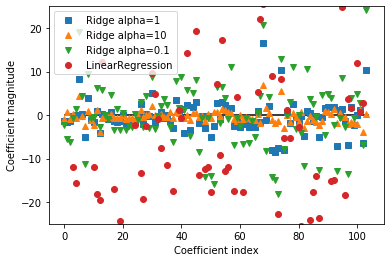

In [82]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Abbildung 2-12. Vergleich von Koeffizientengrößen für die Ridge-Regression mit verschiedenen Werten der Alpha- und linearen Regression

Hier zählt die x-Achse die Einträge von coef_ auf: x=0 zeigt den dem ersten Merkmal zugeordneten Koeffizienten, x=1 den dem zweiten Merkmal zugeordneten Koeffizienten und so weiter bis zu x=100. Die y-Achse zeigt die Zahlenwerte der entsprechenden Werte der Koeffizienten. Die Haupteinnahme ist hier, dass für alpha=10 die Koeffizienten meist zwischen etwa -3 und 3 liegen. Die Koeffizienten für das Ridge-Modell mit alpha=1 sind etwas größer. Die Punkte, die Alpha=0,1 entsprechen, haben noch eine größere Größe, und viele der Punkte, die einer linearen Regression ohne Regularisierung entsprechen (was Alpha=0 wäre), sind so groß, dass sie außerhalb des Charts liegen.

Eine weitere Möglichkeit, den Einfluss der Regularisierung zu verstehen, besteht darin, einen Alpha-Wert festzulegen, aber die Menge der verfügbaren Trainingsdaten zu variieren. Für Abbildung 2-13 haben wir den Boston Housing-Datensatz unterabgetastet und LinearRegression und Ridge(alpha=1) auf Teilmengen zunehmender Größe ausgewertet (Diagramme, die die Modellleistung als Funktion der Datensatzgröße zeigen, werden Lernkurven genannt):

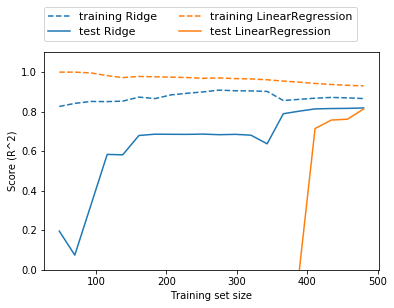

In [83]:
mglearn.plots.plot_ridge_n_samples()

Abbildung 2-13. Lernkurven für Ridge-Regression und lineare Regression auf dem Datensatz Boston Housing

 Wie zu erwarten, ist der Trainingswert für alle Datensatzgrößen, sowohl für Ridge als auch für lineare Regression, höher als der Testergebnis. Da Ridge regularisiert ist, ist der Trainingsscore von Ridge niedriger als der Trainingsscore für lineare Regression über das gesamte Brett. Die Testergebnisse für Ridge sind jedoch besser, insbesondere für kleine Teilmengen der Daten. Für weniger als 400 Datenpunkte ist die lineare Regression nicht in der Lage, etwas zu lernen. Wenn immer mehr Daten für das Modell verfügbar werden, verbessern sich beide Modelle, und die lineare Regression holt am Ende den Ridge ein. Die Lektion hier ist, dass mit genügend Trainingsdaten die Regularisierung an Bedeutung verliert, und bei genügend Daten haben Ridge und lineare Regression die gleiche Leistung (die Tatsache, dass dies hier bei Verwendung des vollständigen Datensatzes nur durch Zufall geschieht). Ein weiterer interessanter Aspekt von Abbildung 2-13 ist die Abnahme der Trainingsleistung für die lineare Regression. Wenn weitere Daten hinzugefügt werden, wird es für ein Modell schwieriger, die Daten zu überarbeiten oder zu speichern.

Lasso

Eine Alternative zu Ridge zur Regularisierung der linearen Regression ist Lasso. Wie bei der Ridge-Regression beschränkt auch die Verwendung des Lasso die Koeffizienten auf nahezu Null, aber auf eine etwas andere Weise, die als L1-Regulierung bezeichnet wird.8 Die Folge der L1-Regulierung ist, dass bei der Verwendung des Lasso einige Koeffizienten genau Null sind. Das bedeutet, dass einige Features vom Modell völlig ignoriert werden. Dies kann als eine Form der automatischen Merkmalsauswahl angesehen werden. Wenn einige Koeffizienten genau Null sind, ist ein Modell oft leichter zu interpretieren und kann die wichtigsten Merkmale Ihres Modells offenbaren. Lassen Sie uns das Lasso auf den erweiterten Boston Housing-Datensatz anwenden:

In [84]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Wie du sehen kannst, macht Lasso ziemlich schlecht, sowohl beim Training als auch beim Testset. Dies deutet darauf hin, dass wir unterbesetzt sind, und wir stellen fest, dass es nur 4 der 105 Funktionen verwendet hat. Ähnlich wie Ridge hat das Lasso auch einen Regularisierungsparameter, alpha, der steuert, wie stark Koeffizienten gegen Null gedrückt werden. Im vorherigen Beispiel haben wir den Standard alpha=1.0 verwendet. Um die Unteranpassung zu reduzieren, versuchen wir, Alpha zu reduzieren. Wenn wir dies tun, müssen wir auch die Standardeinstellung von max_iter (die maximale Anzahl der auszuführenden Iterationen) erhöhen: 

In [85]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


Ein niedrigerer Alpha-Wert erlaubte es uns, ein komplexeres Modell anzupassen, das besser an den Trainings- und Testdaten arbeitete. Die Leistung ist etwas besser als mit Ridge, und wir nutzen nur 33 der 105 Funktionen. Dies macht dieses Modell potenziell leichter verständlich.  Wenn wir Alpha jedoch zu niedrig einstellen, entfernen wir wieder den Effekt der Regularisierung und führen zu einer Überfindung, mit einem Ergebnis ähnlich der LinearRegression:

In [89]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Auch hier können wir die Koeffizienten der verschiedenen Modelle darstellen, ähnlich wie in Abbildung 2-12. Das Ergebnis ist in Abbildung 2-14 dargestellt:

Text(0, 0.5, 'Coefficient magnitude')

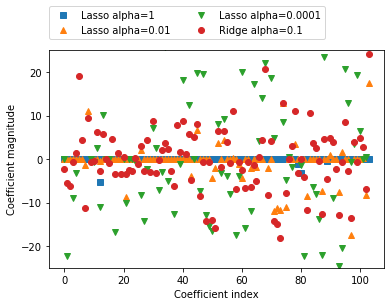

In [90]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Abbildung 2-14. Vergleich von Koeffizientengrößen für die Lasso-Regression mit verschiedenen Werten der Alpha- und Ridge-Regression

Für alpha=1 sehen wir nicht nur, dass die meisten Koeffizienten Null sind (was wir bereits kannten), sondern dass auch die übrigen Koeffizienten klein sind. Wenn wir Alpha auf 0,01 reduzieren, erhalten wir die Lösung, die als grüne Punkte dargestellt wird, was dazu führt, dass die meisten Funktionen genau Null sind. Mit alpha=0.00001 erhalten wir ein Modell, das ziemlich unregelmäßig ist, mit den meisten Koeffizienten ungleich Null und von großer Größe. Zum Vergleich: Die beste Firstlösung ist in Blaugrün dargestellt. Das Ridge-Modell mit alpha=0,1 hat eine ähnliche prädiktive Leistung wie das Lasso-Modell mit alpha=0,01, aber bei Ridge sind alle Koeffizienten ungleich Null. In der Praxis ist die Ridge-Regression in der Regel die erste Wahl zwischen diesen beiden Modellen. Wenn Sie jedoch eine große Anzahl von Funktionen haben und erwarten, dass nur wenige von ihnen wichtig sind, könnte Lasso eine bessere Wahl sein. Ebenso, wenn Sie ein Modell haben möchten, das leicht zu interpretieren ist, wird Lasso ein Modell zur Verfügung stellen, das einfacher zu verstehen ist, da es nur eine Teilmenge der Eingabefunktionen auswählt. scikit-learn bietet auch die ElasticNet-Klasse, die die Strafen von Lasso und Ridge kombiniert. In der Praxis funktioniert diese Kombination am besten, allerdings um den Preis, dass zwei Parameter eingestellt werden müssen: einer für die L1-Regulierung und einer für die L2-Regulierung.

Lineare Modelle zur Klassifizierung

Lineare Modelle werden auch weitgehend für die Klassifizierung verwendet. Betrachten wir zunächst die binäre Klassifizierung. In diesem Fall wird eine Vorhersage mit der folgenden Formel durchgeführt:

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

Die Formel sieht derjenigen der linearen Regression sehr ähnlich, aber anstatt nur die gewichtete Summe der Merkmale zurückzugeben, schwenken wir den vorhergesagten Wert bei Null. Wenn die Funktion kleiner als Null ist, prognostizieren wir die Klasse -1; wenn sie größer als Null ist, prognostizieren wir die Klasse +1. Diese Vorhersageregel ist für alle linearen Modelle zur Klassifizierung gleich. Auch hier gibt es viele verschiedene Möglichkeiten, die Koeffizienten (w) und den Schnittpunkt (b) zu finden.


Bei linearen Modellen für die Regression ist die Ausgabe ŷ eine lineare Funktion der Merkmale: eine Linie, Ebene oder Hyperebene (in höheren Dimensionen). Bei linearen Modellen zur Klassifizierung ist die Entscheidungsgrenze eine lineare Funktion des Eingangs. Mit anderen Worten, ein (binärer) linearer Klassifikator ist ein Klassifizierer, der zwei Klassen durch eine Linie, eine Ebene oder eine Hyperebene trennt. Wir werden in diesem Abschnitt Beispiele dafür sehen.

Es gibt viele Algorithmen zum Erlernen linearer Modelle. Diese Algorithmen unterscheiden sich alle in den folgenden zwei Punkten:  

Die Art und Weise, wie sie messen, wie gut eine bestimmte Kombination von Koeffizienten und Schnittpunkt zu den Trainingsdaten passt.  

Ob und welche Art von Regularisierung sie verwenden Verschiedene Algorithmen wählen verschiedene Möglichkeiten, um zu messen, was "passend zum Trainingsset" bedeutet. 

Aus technisch-mathematischen Gründen ist es nicht möglich, w und b so anzupassen, dass die Anzahl der Fehlklassifikationen, die die Algorithmen erzeugen, minimiert wird, wie man vielleicht hoffen könnte. Für unsere Zwecke und viele Anwendungen sind die unterschiedlichen Auswahlmöglichkeiten für Punkt 1 der vorhergehenden Liste (sogenannte Verlustfunktionen) von untergeordneter Bedeutung. Die beiden gebräuchlichsten linearen Klassifikationsalgorithmen sind die logistische Regression, implementiert in linear_model.LogisticRegression, und lineare Unterstützungsvektormaschinen (lineare SVMs), implementiert in svm.LinearSVC (SVC steht für Support Vektorklassifizierer). Trotz ihres Namens ist LogisticRegression ein Klassifizierungsalgorithmus und kein Regressionsalgorithmus, und sie sollte nicht mit LinearRegression verwechselt werden. Wir können die Modelle LogisticRegression und LinearSVC auf den Schmiede-Datensatz anwenden und die Entscheidungsgrenze visualisieren, wie sie von den linearen Modellen gefunden wird (Abbildung 2-15):

/home/ralfi/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ralfi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


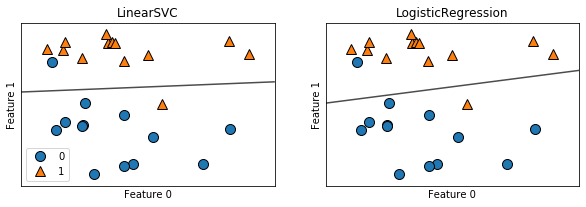

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

Abbildung 2-15. Entscheidungsgrenzen eines linearen SVM und logistische Regression auf den Forge-Datensatz mit den Standardparametern

In dieser Abbildung haben wir das erste Merkmal des Schmiede-Datensatzes auf der x-Achse und das zweite Merkmal auf der y-Achse, wie bisher. Wir stellen die von LinearSVC und LogisticRegression gefundenen Entscheidungsgrenzen jeweils als gerade Linien dar und trennen den Bereich der Klasse 1 oben von dem Bereich der Klasse 0 unten. Mit anderen Worten, jeder neue Datenpunkt, der über der schwarzen Linie liegt, wird vom jeweiligen Klassifizierer in die Klasse 1 eingestuft, während jeder Punkt, der unter der schwarzen Linie liegt, in die Klasse 0 eingestuft wird. Die beiden Modelle haben ähnliche Entscheidungsgrenzen. Beachten Sie, dass beide zwei der Punkte falsch klassifizieren. Standardmäßig wenden beide Modelle eine L2-Regelung an, genau wie Ridge bei der Regression. Für LogisticRegression und LinearSVC wird der Trade-off-Parameter, der die Stärke der Regularisierung bestimmt, C genannt, und höhere Werte von C entsprechen einer geringeren Regularisierung. Mit anderen Worten, wenn Sie einen hohen Wert für den Parameter C verwenden, versuchen Logis ticRegression und LinearSVC, den Trainingssatz so gut wie möglich anzupassen, während bei niedrigen Werten des Parameters C die Modelle mehr Wert auf das Finden eines Koeffizientenvektors (w) legen, der nahe Null liegt.

Es gibt noch einen weiteren interessanten Aspekt, wie sich der Parameter C verhält. Die Verwendung niedriger C-Werte führt dazu, dass die Algorithmen versuchen, sich an die "Mehrheit" der Datenpunkte anzupassen, während die Verwendung eines höheren C-Wertes die Bedeutung der korrekten Klassifizierung jedes einzelnen Datenpunkts betont. Hier ist eine Abbildung mit LinearSVC (Abbildung 2-16):

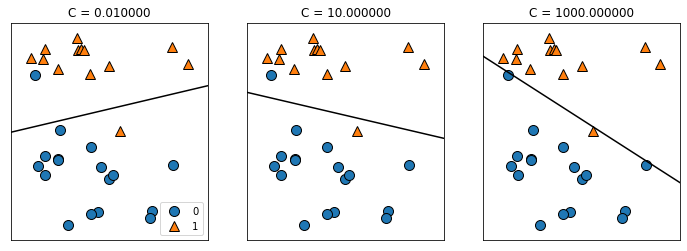

In [94]:
mglearn.plots.plot_linear_svc_regularization()

Abbildung 2-16. Entscheidungsgrenzen eines linearen SVM auf dem Forge-Datensatz für verschiedene Werte von C

Auf der linken Seite haben wir ein sehr kleines C, was einer großen Regularisierung entspricht. Die meisten Punkte in der Klasse 0 stehen ganz oben, und die meisten Punkte in der Klasse 1 sind ganz unten. Das stark regulierte Modell wählt eine relativ horizontale Linie und klassifiziert zwei Punkte falsch. Im mittleren Plot ist C etwas höher, und das Modell konzentriert sich mehr auf die beiden falsch klassifizierten Samples und neigt die Entscheidungsgrenze. Auf der rechten Seite schließlich kippt der sehr hohe Wert von C im Modell die Entscheidungsgrenze stark und klassifiziert nun alle Punkte in der Klasse 0 korrekt. Einer der Punkte in der Klasse 1 ist immer noch falsch klassifiziert, da es nicht möglich ist, alle Punkte in diesem Datensatz korrekt mit einer Geraden zu klassifizieren. Das auf der rechten Seite dargestellte Modell versucht, alle Punkte korrekt zu klassifizieren, erfasst aber möglicherweise das Gesamtlayout der Klassen nicht gut. Mit anderen Worten, dieses Modell ist wahrscheinlich übertrieben.

Ähnlich wie bei der Regression können lineare Modelle zur Klassifizierung in niedrigdimensionalen Räumen sehr restriktiv erscheinen und nur Entscheidungsgrenzen als gerade Linien oder Ebenen berücksichtigen. Auch in hohen Dimensionen werden lineare Modelle zur Klassifizierung sehr leistungsfähig, und der Schutz vor Überpassung wird immer wichtiger, wenn es um mehr Features geht. Lassen Sie uns LinearLogistic im Detail anhand des Datensatzes Brustkrebs analysieren:

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

NameError: name 'train_test_split' is not defined

Der Standardwert von C=1 bietet eine recht gute Leistung mit einer Genauigkeit von 95% sowohl beim Training als auch beim Testset. Da die Leistung von Trainings- und Testsets jedoch sehr nahe beieinander liegt, ist es wahrscheinlich, dass wir nicht ausreichend ausgestattet sind. Lassen Sie uns versuchen, C zu erhöhen, um einem flexibleren Modell zu entsprechen:

In [97]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.967
Test set score: 0.965


/home/ralfi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Die Verwendung von C=100 führt zu einer höheren Genauigkeit der Trainingssets und auch zu einer leicht erhöhten Genauigkeit der Testsets, was unsere Intuition bestätigt, dass ein komplexeres Modell besser funktionieren sollte. 

Wir können auch untersuchen, was passiert, wenn wir ein noch stärker reglementiertes Modell als den Standardwert von C=1 verwenden, indem wir C=0,01 einstellen:

In [98]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/home/ralfi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wie erwartet, nimmt sowohl die Genauigkeit des Trainings- als auch des Testsets gegenüber den Standardparametern ab, wenn man sich von einem bereits untertauglichen Modell aus mehr nach links entlang der in Abbildung 2-1 dargestellten Skala bewegt. Abschließend betrachten wir die Koeffizienten, die von den Modellen mit den drei verschiedenen Einstellungen des Regularisierungsparameters C gelernt wurden (Abbildung 2-17):

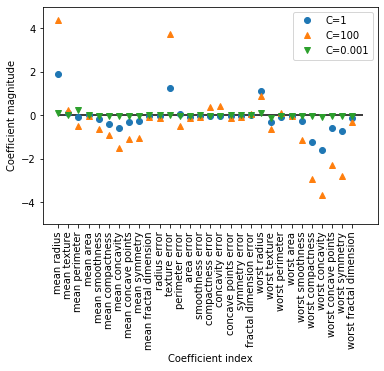

In [99]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Abbildung 2-17. Koeffizienten, die durch logistische Regression auf dem Datensatz Brustkrebs für verschiedene Werte von C gelernt wurden.

Wenn wir ein besser interpretierbares Modell wünschen, könnte die Verwendung der L1-Regulierung helfen, da sie das Modell auf die Verwendung weniger Funktionen beschränkt. Hier sind die Koeffizientendiagramm- und Klassifizierungsgenauigkeiten für die L1-Regulierung (Abbildung 2-18):

/home/ralfi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ralfi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ralfi/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ralfi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


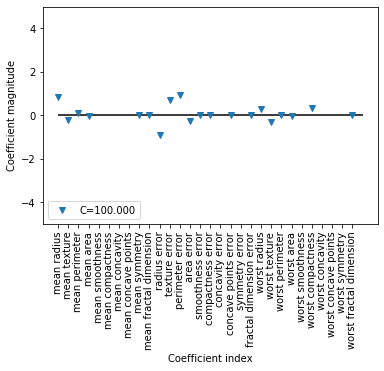

In [101]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_test, y_test)))
plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

Wie Sie sehen können, gibt es viele Parallelen zwischen linearen Modellen für die binäre Klassifizierung und linearen Modellen für die Regression. Wie in der Regression ist der Hauptunterschied zwischen den Modellen der Strafparameter, der die Regularisierung beeinflusst und ob das Modell alle verfügbaren Funktionen nutzt oder nur eine Teilmenge auswählt.

Abbildung 2-18. Koeffizienten, die durch logistische Regression mit L1-Strafe auf dem Brustkrebs-Datensatz für verschiedene Werte von C

In [51]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import sklearn